* [인프런 - 단 두 장의 문서로 데이터 분석과 시각화 뽀개기](https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas)에서 전 코드에 대한 강좌를 보실 수 있습니다.

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [2]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [7]:
table = pd.read_csv(r'C:/Users/ansj0/doitpandas/서울시 코로나19 확진자 현황.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 0: invalid start byte

In [16]:
table

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [4]:
table[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,1412,1083,807,1720,1425,932,1104,481,1346,963,1106,1257,1001
1,+2,+11,+3,+4,+4,+13,+1,+2,+4,+3,+6,+2,+1
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,791,1166,794,1313,1693,1162,1140,846,1292,591,488,1289,3448
4,0,+3,+8,+5,+7,+4,+6,+10,+4,0,+3,+9,+5


In [7]:
df = table[3]

In [6]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [13]:
df.to_csv('seoul_covid19_fake.csv', index = False)

In [12]:
df = pd.read_csv('seoul_covid19_fake.csv')
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


* CSV 파일 다운로드 : https://bit.ly/seoul-covid19-csv-file

In [ ]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by='연번', ascending=False)

In [ ]:
# head 로 미리보기를 합니다.

df.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN
5,5458,24400,10.07.,노원구,-,기타 확진자 접촉,NaN
6,5457,24410,10.07.,관악구,-,관악구 큰믿음유신감리교회,NaN
7,5456,24370,10.07.,도봉구,-,타시도 확진자 접촉,NaN
8,5455,24369,10.07.,도봉구,-,타시도 확진자 접촉,NaN
9,5454,24407,10.07.,관악구,-,관악구 사랑나무 어린이집,NaN


In [ ]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5462,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

In [ ]:
# colab 사용자만 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 -> 런타임 다시 시작하고 아래 한글폰트 설정 시작
# 위에서 csv 파일은 다시 불러와야함.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,495 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and di

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


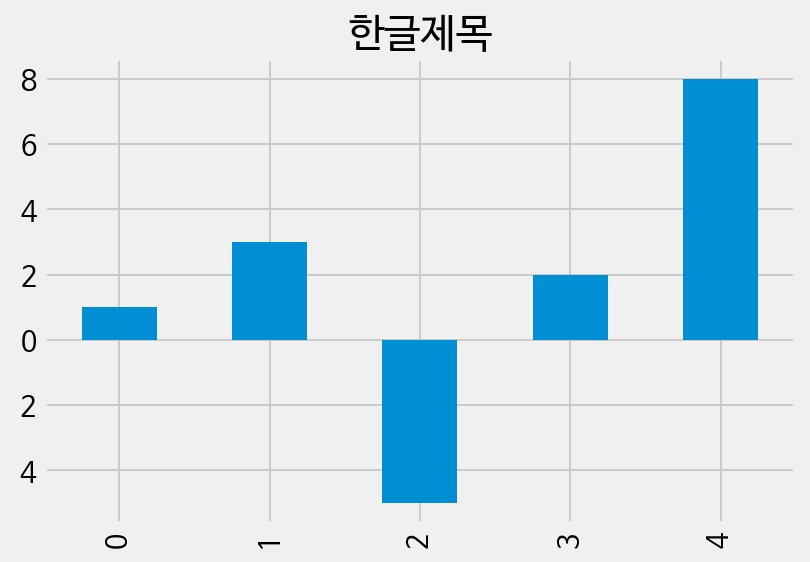

In [ ]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 
plt.style.use('fivethirtyeight')
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,3,-5,2,8]).plot.bar(title='한글제목')


### 시각화 선명하게 설정하기

In [ ]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.



## 확진일

In [ ]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
2.2.       1
1.24.      1
3.5.       1
4.18.      1
2.6.       1
Name: 확진일, Length: 230, dtype: int64

In [ ]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df['확진일'].head()

0    10.07.
1    10.07.
2    10.07.
3    10.07.
4    10.07.
Name: 확진일, dtype: object

In [ ]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN


In [ ]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))
df[['확진일','확진일자']]

,확진일,확진일자
0,10.07.,2020-10-07
1,10.07.,2020-10-07
2,10.07.,2020-10-07
3,10.07.,2020-10-07
4,10.07.,2020-10-07
...,...,...
5458,1.31.,2020-01-31
5459,1.30.,2020-01-30
5460,1.30.,2020-01-30
5461,1.30.,2020-01-30


In [ ]:
# 월만 추출합니다.

df['월'] = df['확진일자'].dt.month
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10


In [ ]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df['주'] = df['확진일자'].dt.week
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

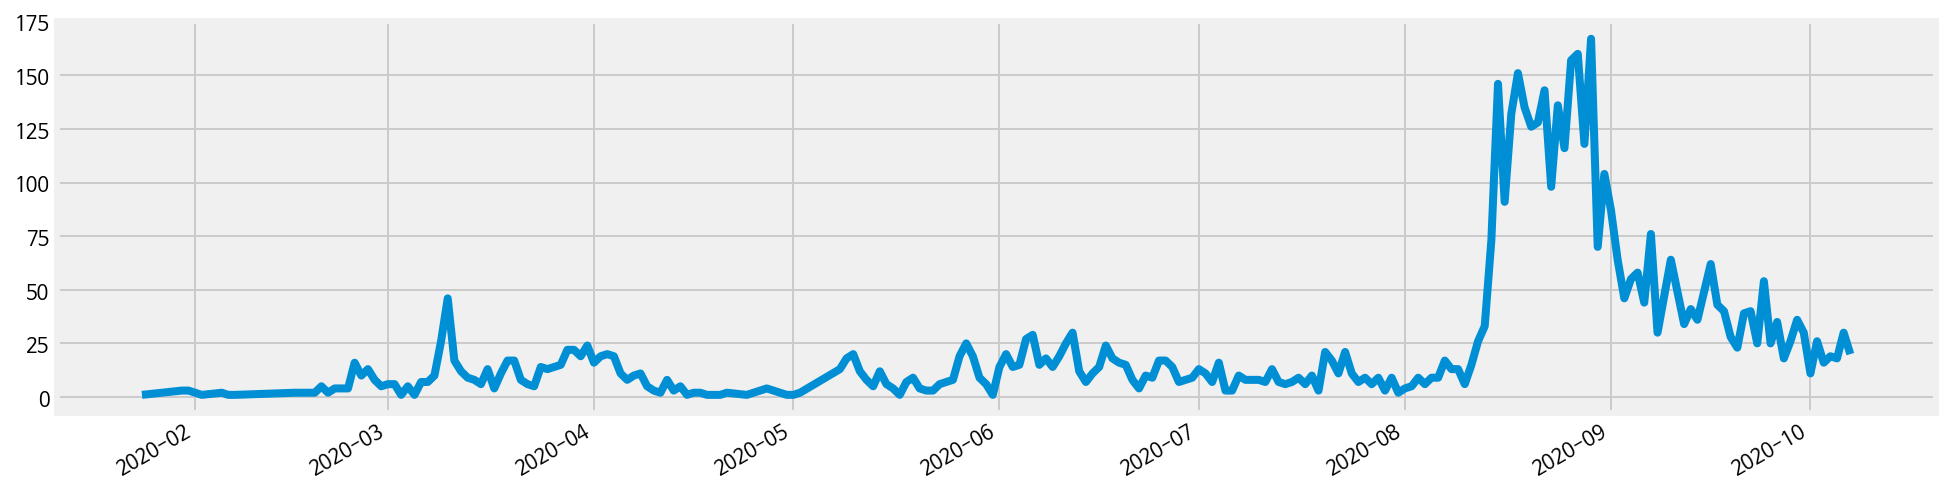

In [ ]:
# 확진일자로 선그래프를 그립니다.

df['확진일자'].value_counts().plot(figsize = (15,4))

### 선그래프에 값 표시하기

In [ ]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.

df['월일'] = df['확진일자'].astype(str).map(lambda x: x[5:])
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07
...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30


In [ ]:
day_count = df['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
10-03    16
10-04    19
10-05    18
10-06    30
10-07    20
Name: 월일, Length: 229, dtype: int64

In [ ]:
day_count.iloc[0]

1

In [ ]:
for i in range(len(day_count)):
  case_count = day_count.iloc[i]
  if case_count > 150:
    print(i,case_count)

178 151
186 157
187 160
189 167


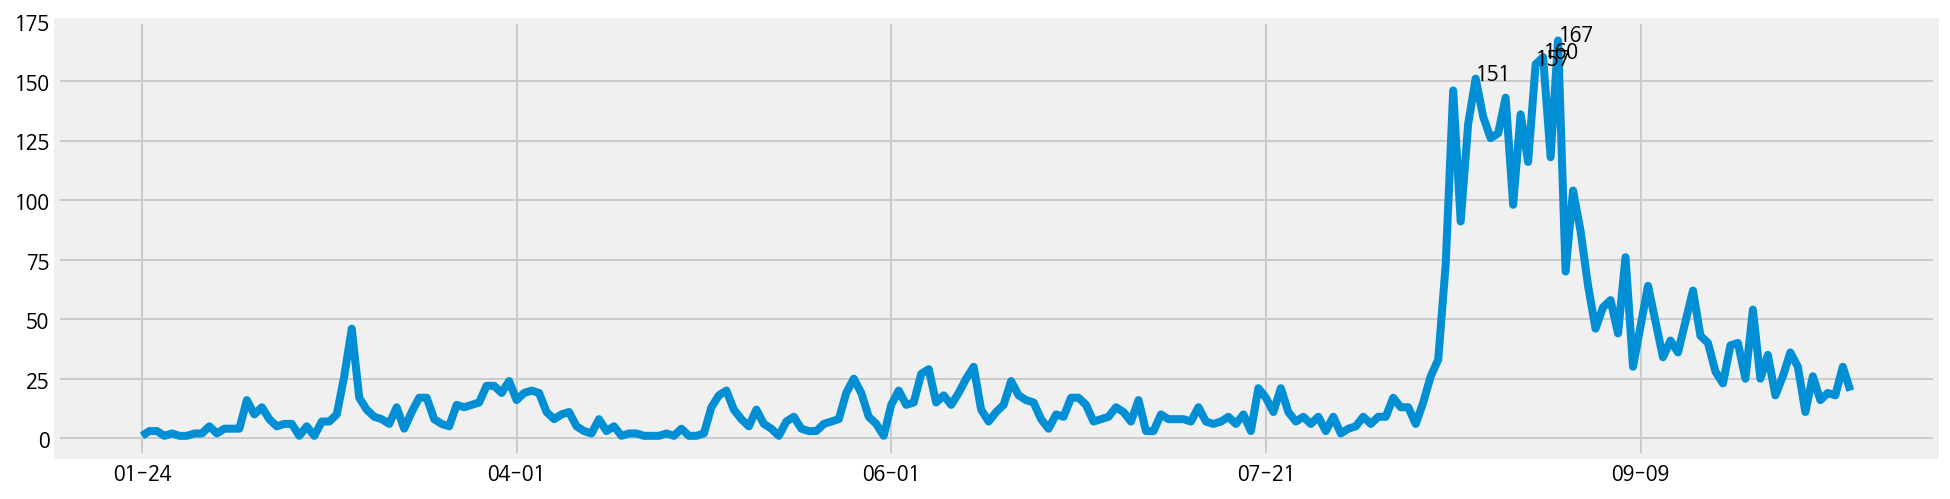

In [ ]:
graph = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
  case_count = day_count.iloc[i]
  if case_count > 150:
    graph.text(x=i, y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [ ]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
10-03    16
10-04    19
10-05    18
10-06    30
10-07    20
Name: 월일, Length: 229, dtype: int64

In [ ]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count    229.000000
mean      23.855895
std       33.782343
min        1.000000
25%        6.000000
50%       12.000000
75%       24.000000
max      167.000000
Name: 월일, dtype: float64

In [ ]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [ ]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df['월일'] == "08-29"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1550,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1585,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
1612,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
1613,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
1614,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
...,...,...,...,...,...,...,...,...,...,...,...
1800,3663,19451,8.29.,강남구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1801,3662,19462,8.29.,동대문구,-,동대문구 sk탁구클럽,퇴원,2020-08-29,8,35,08-29
1802,3661,19416,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1803,3660,19434,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 막대그래프 그리기

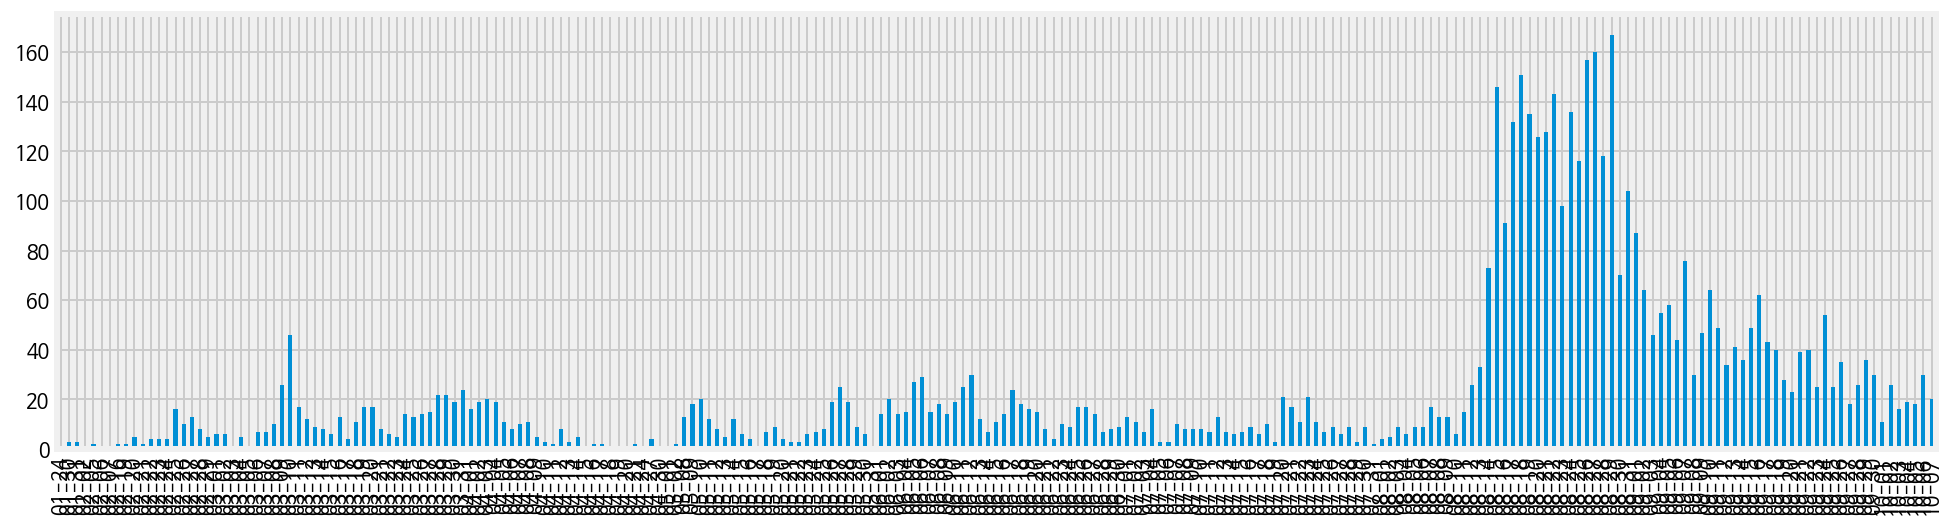

In [ ]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(15,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

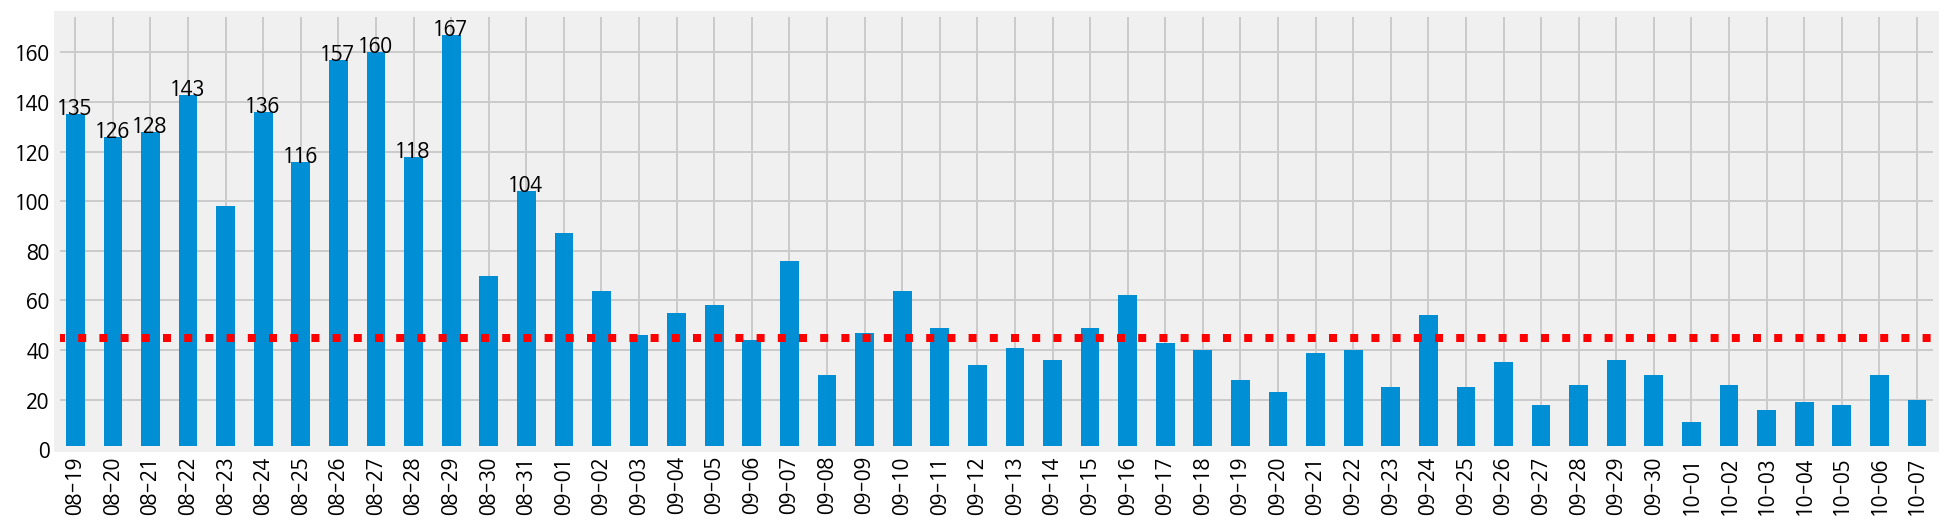

In [ ]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

graph = day_count[-50:].plot.bar(figsize=(15,4))

for i in range(50):
  case_count = day_count[-50:].iloc[i]
  if case_count> 100:
    graph.text(x=i-0.5, y=case_count, s = case_count)
  
graph.axhline(day_count[-50:].median(),linestyle=":", color = 'red')

### 월별 확진자 수 그리기

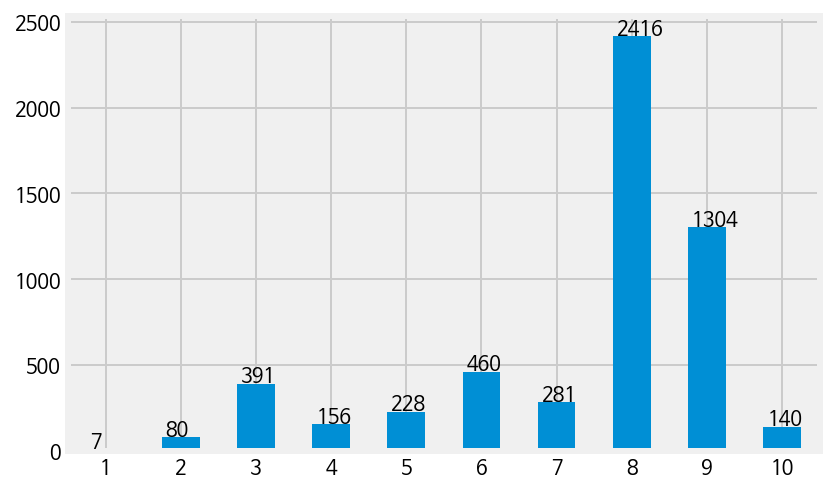

In [ ]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df['월'].value_counts().sort_index()

graph = month_case.plot.bar(rot = 0)

for i in range(len(month_case)):
  graph.text(x=i-0.2, y=month_case.iloc[i]+10,  s = month_case.iloc[i])

### 주단위 확진자수 그리기

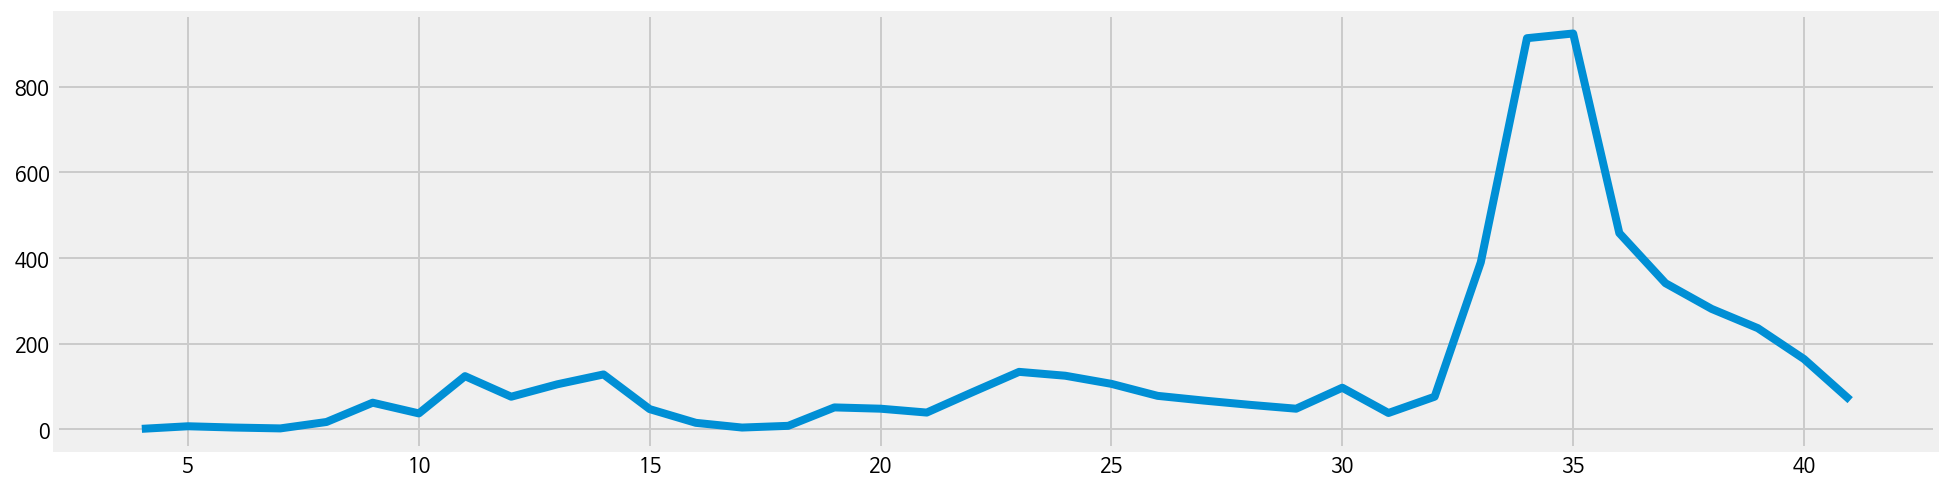

In [ ]:
# 주별로 빈도수를 구합니다.


week_case = df['주'].value_counts().sort_index()
week_case.plot(figsize = (15,4))


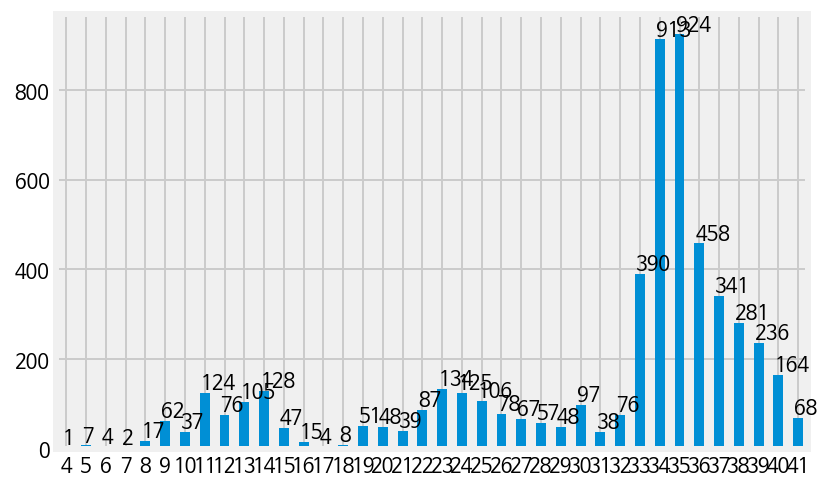

In [ ]:
# 주단위 빈도수 막대그래프로 그리기
week_case = df['주'].value_counts().sort_index()

graph = week_case.plot.bar(rot = 0)

for i in range(len(week_case)):
  graph.text(x=i-0.2, y=week_case.iloc[i]+10,  s = week_case.iloc[i])


### 월-주 함께 그리기

In [ ]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07


In [ ]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.

month_week_case = df.groupby(['월', '주'])['연번'].count()
month_week_case

월   주 
1   4       1
    5       6
2   5       1
    6       4
    7       2
    8      17
    9      56
3   9       6
    10     37
    11    124
    12     76
    13    105
    14     43
4   14     85
    15     47
    16     15
    17      4
    18      5
5   18      3
    19     51
    20     48
    21     39
    22     87
6   23    134
    24    125
    25    106
    26     78
    27     17
7   27     50
    28     57
    29     48
    30     97
    31     29
8   31      9
    32     76
    33    390
    34    913
    35    924
    36    104
9   36    354
    37    341
    38    281
    39    236
    40     92
10  40     72
    41     68
Name: 연번, dtype: int64

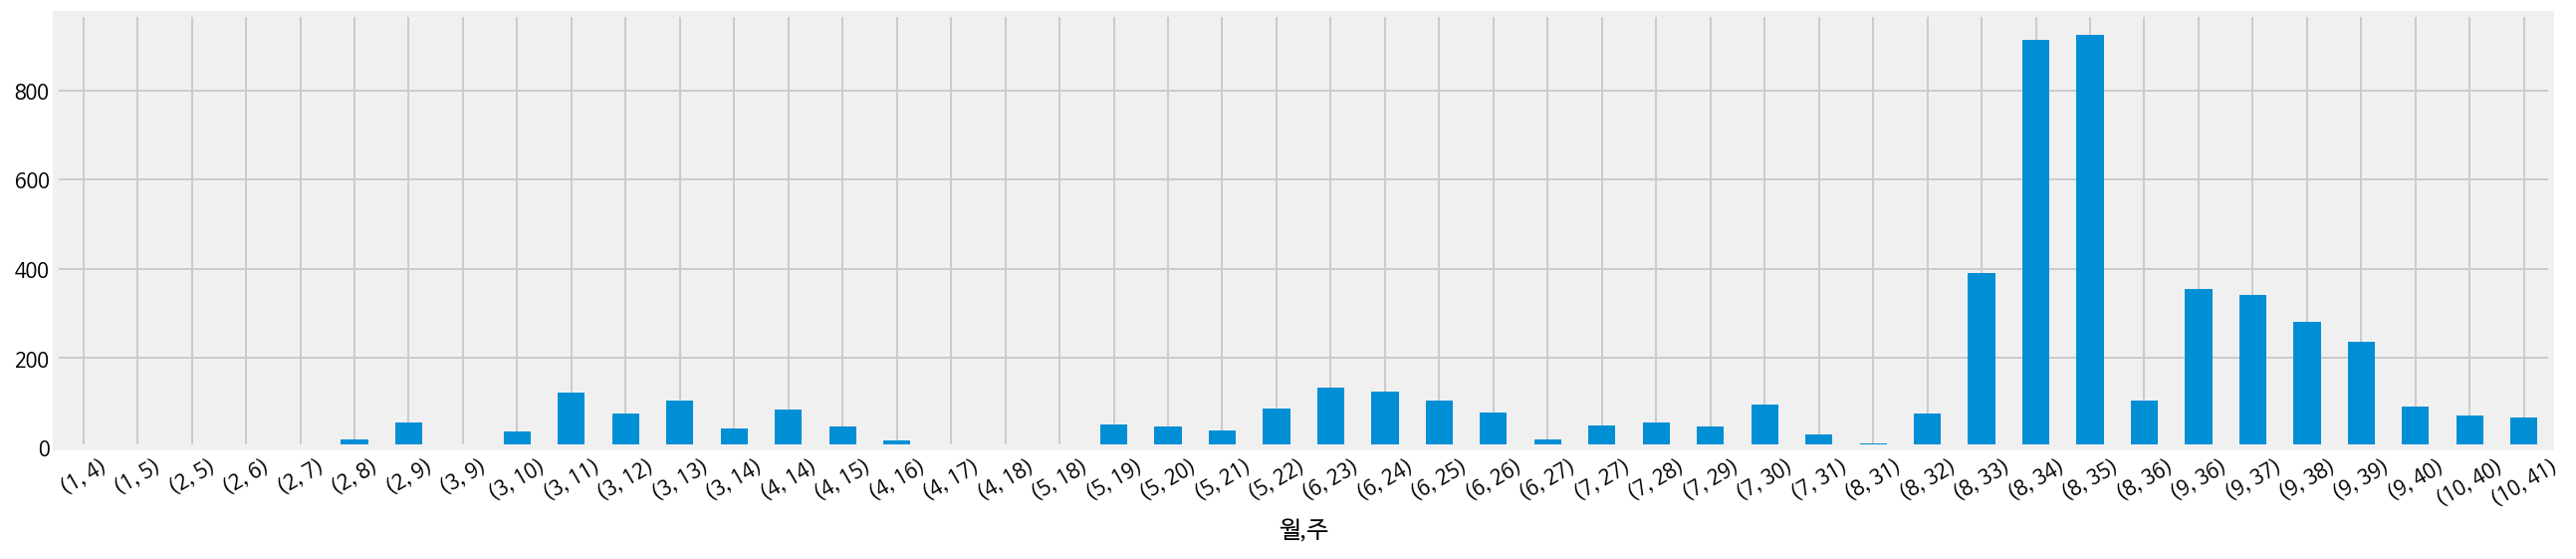

In [ ]:
# 월-주 를 함께 그래프에 표현하기

month_week_case.plot.bar(figsize=(20,4), rot=30)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [ ]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07


In [ ]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5462,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,2020-01-24,1,4,01-24


In [ ]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1,7]
last_day = df.iloc[0,7]

In [ ]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
               '2020-10-06', '2020-10-07'],
              dtype='datetime64[ns]', length=258, freq='D')

In [ ]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.

df_days = pd.DataFrame({'확진일자' : days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
253,2020-10-03
254,2020-10-04
255,2020-10-05
256,2020-10-06


In [ ]:
# 확진일자별로 빈도수 구하기

daily_case = df['확진일자'].value_counts()
daily_case

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
             ... 
2020-05-31      1
2020-04-15      1
2020-04-30      1
2020-04-20      1
2020-04-19      1
Name: 확진일자, Length: 229, dtype: int64

In [ ]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
daily_case_df = daily_case.to_frame()
daily_case_df


,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146
...,...
2020-05-31,1
2020-04-15,1
2020-04-30,1
2020-04-20,1


In [ ]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기


daily_case_df.columns = ['확진수']

### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
all_day = df_days.merge(daily_case_df, left_on='확진일자',
                        right_on = daily_case_df.index, how = 'left')

In [ ]:
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
253,2020-10-03,16.0
254,2020-10-04,19.0
255,2020-10-05,18.0
256,2020-10-06,30.0


## 누적 확진자 수 구하기

In [ ]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day['누적확진'] = all_day['확진수'].fillna(0).cumsum()
all_day.tail()

,확진일자,확진수,누적확진
253,2020-10-03,16.0,5376.0
254,2020-10-04,19.0,5395.0
255,2020-10-05,18.0,5413.0
256,2020-10-06,30.0,5443.0
257,2020-10-07,20.0,5463.0


In [ ]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x: x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [ ]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[['일자', '확진수', '누적확진']]
cum_day

,일자,확진수,누적확진
0,01-24,1.0,1.0
1,01-25,NaN,1.0
2,01-26,NaN,1.0
3,01-27,NaN,1.0
4,01-28,NaN,1.0
...,...,...,...
253,10-03,16.0,5376.0
254,10-04,19.0,5395.0
255,10-05,18.0,5413.0
256,10-06,30.0,5443.0


In [ ]:
cum_day = cum_day.set_index('일자')
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
10-03,16.0,5376.0
10-04,19.0,5395.0
10-05,18.0,5413.0


### 데이터프레임으로 그리기

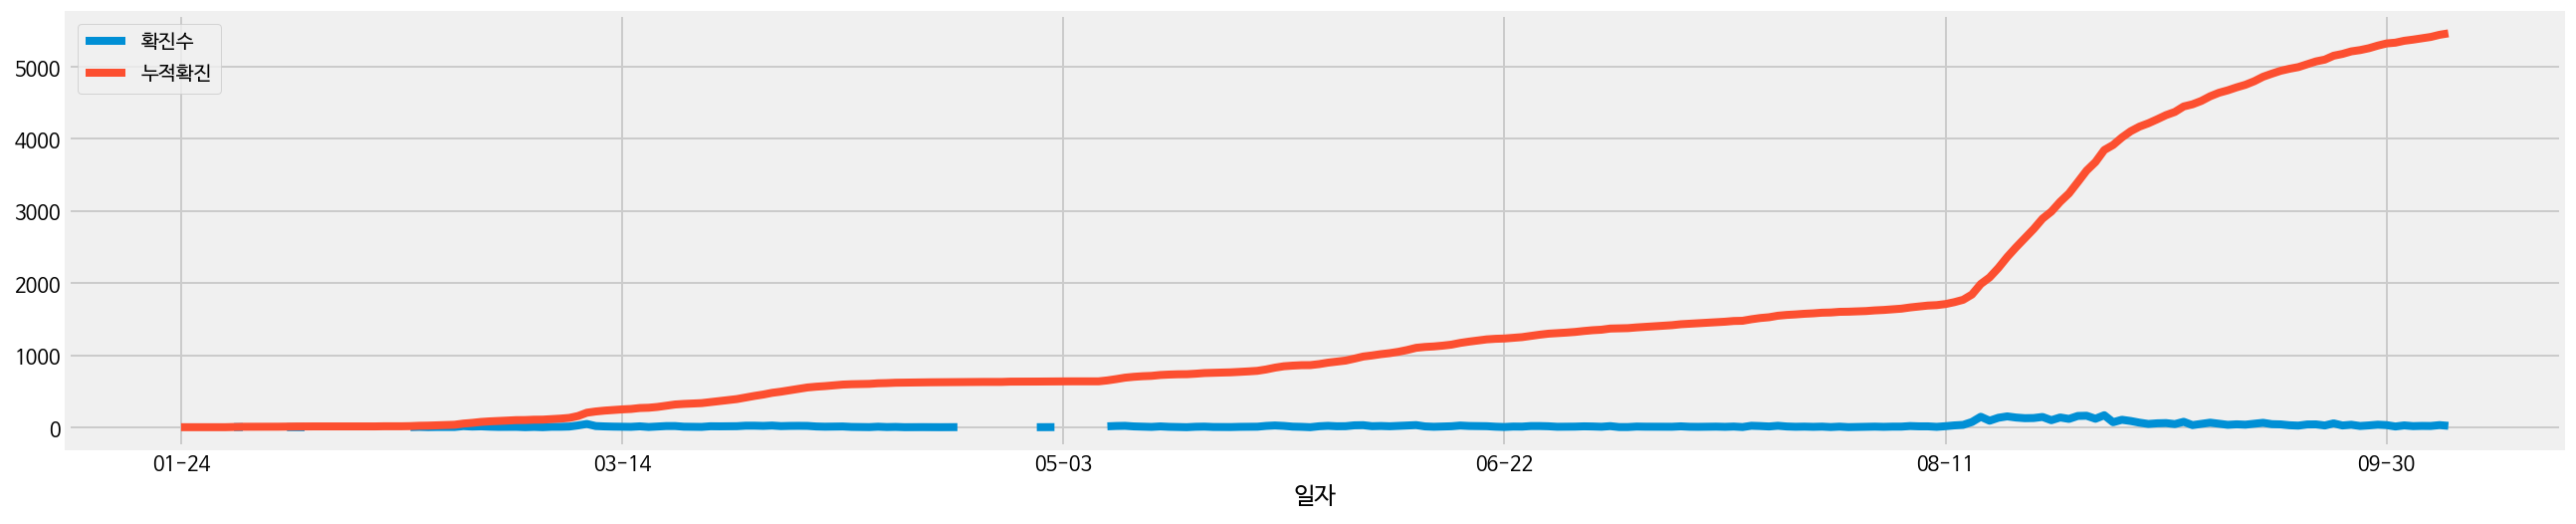

In [ ]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

cum_day.plot(figsize = (20,4))

### 시리즈로 그리기

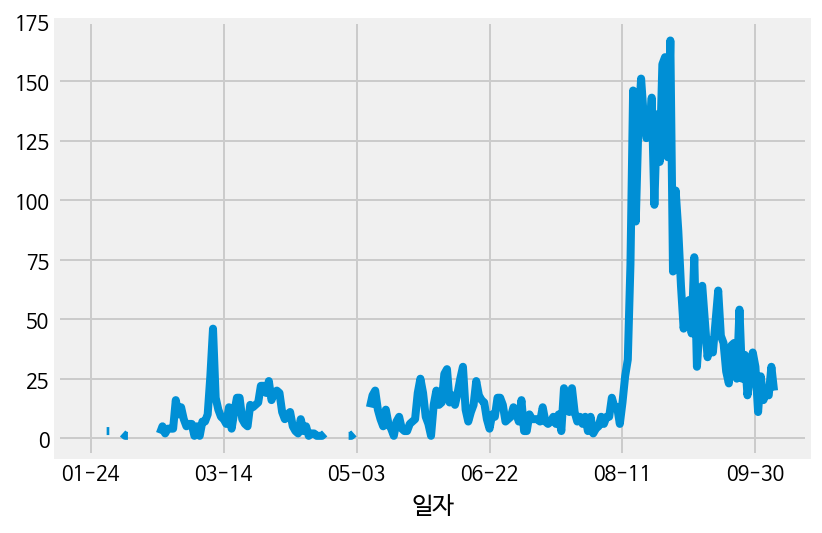

In [ ]:
# 시리즈로 2개의 그래프 그리기
cum_day['확진수'].plot()


### 확진수만 따로 그리기

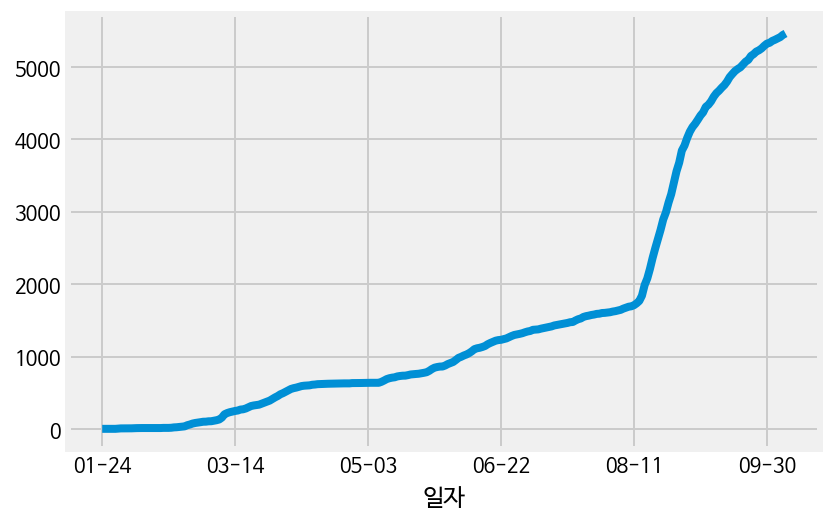

In [ ]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.

cum_day['누적확진'].plot()

### 누적확진만 따로 그리기

In [ ]:
# 누적확진만 따로 그립니다.



### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

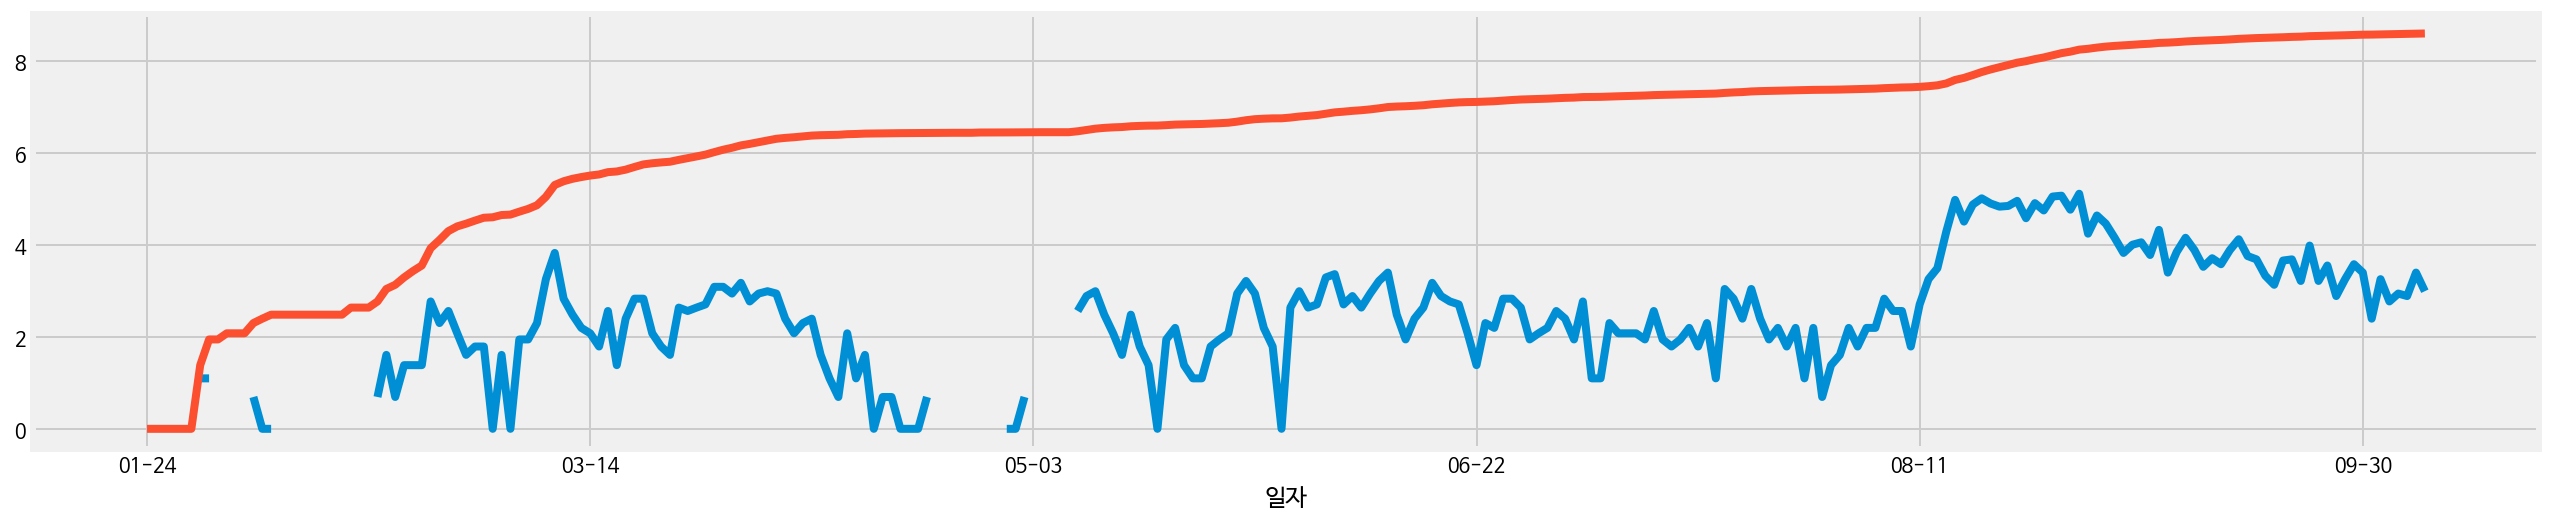

In [ ]:
np.log(cum_day['확진수']).plot()
np.log(cum_day['누적확진']).plot(figsize=(20,4))

### 확진월과 요일 구하기

In [ ]:
all_day

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28
...,...,...,...,...
253,2020-10-03,16.0,5376.0,10-03
254,2020-10-04,19.0,5395.0,10-04
255,2020-10-05,18.0,5413.0,10-05
256,2020-10-06,30.0,5443.0,10-06


In [ ]:
all_day['확진월'] = all_day['확진일자'].dt.month
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


## 요일별 확진 수 

In [ ]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(['확진월', '확진요일'])['확진수'].sum()
all_day_week


확진월  확진요일
1    0        0.0
     1        0.0
     2        0.0
     3        3.0
     4        4.0
             ... 
10   2       20.0
     3       11.0
     4       26.0
     5       16.0
     6       19.0
Name: 확진수, Length: 70, dtype: float64

In [ ]:
all_day_week = all_day_week.unstack().astype(int)

In [ ]:
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [ ]:
all_day_week.columns = ['월', '화', '수', '목', '금','토', '일']
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [ ]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
# dayofweek


In [ ]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.



In [ ]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap='Blues')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,133,166,173,153,144,120,108


## 거주지별 확진자

In [ ]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07


In [ ]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df['거주지'].value_counts()
gu_count.head()

관악구    409
송파구    341
성북구    334
타시도    315
노원구    312
Name: 거주지, dtype: int64

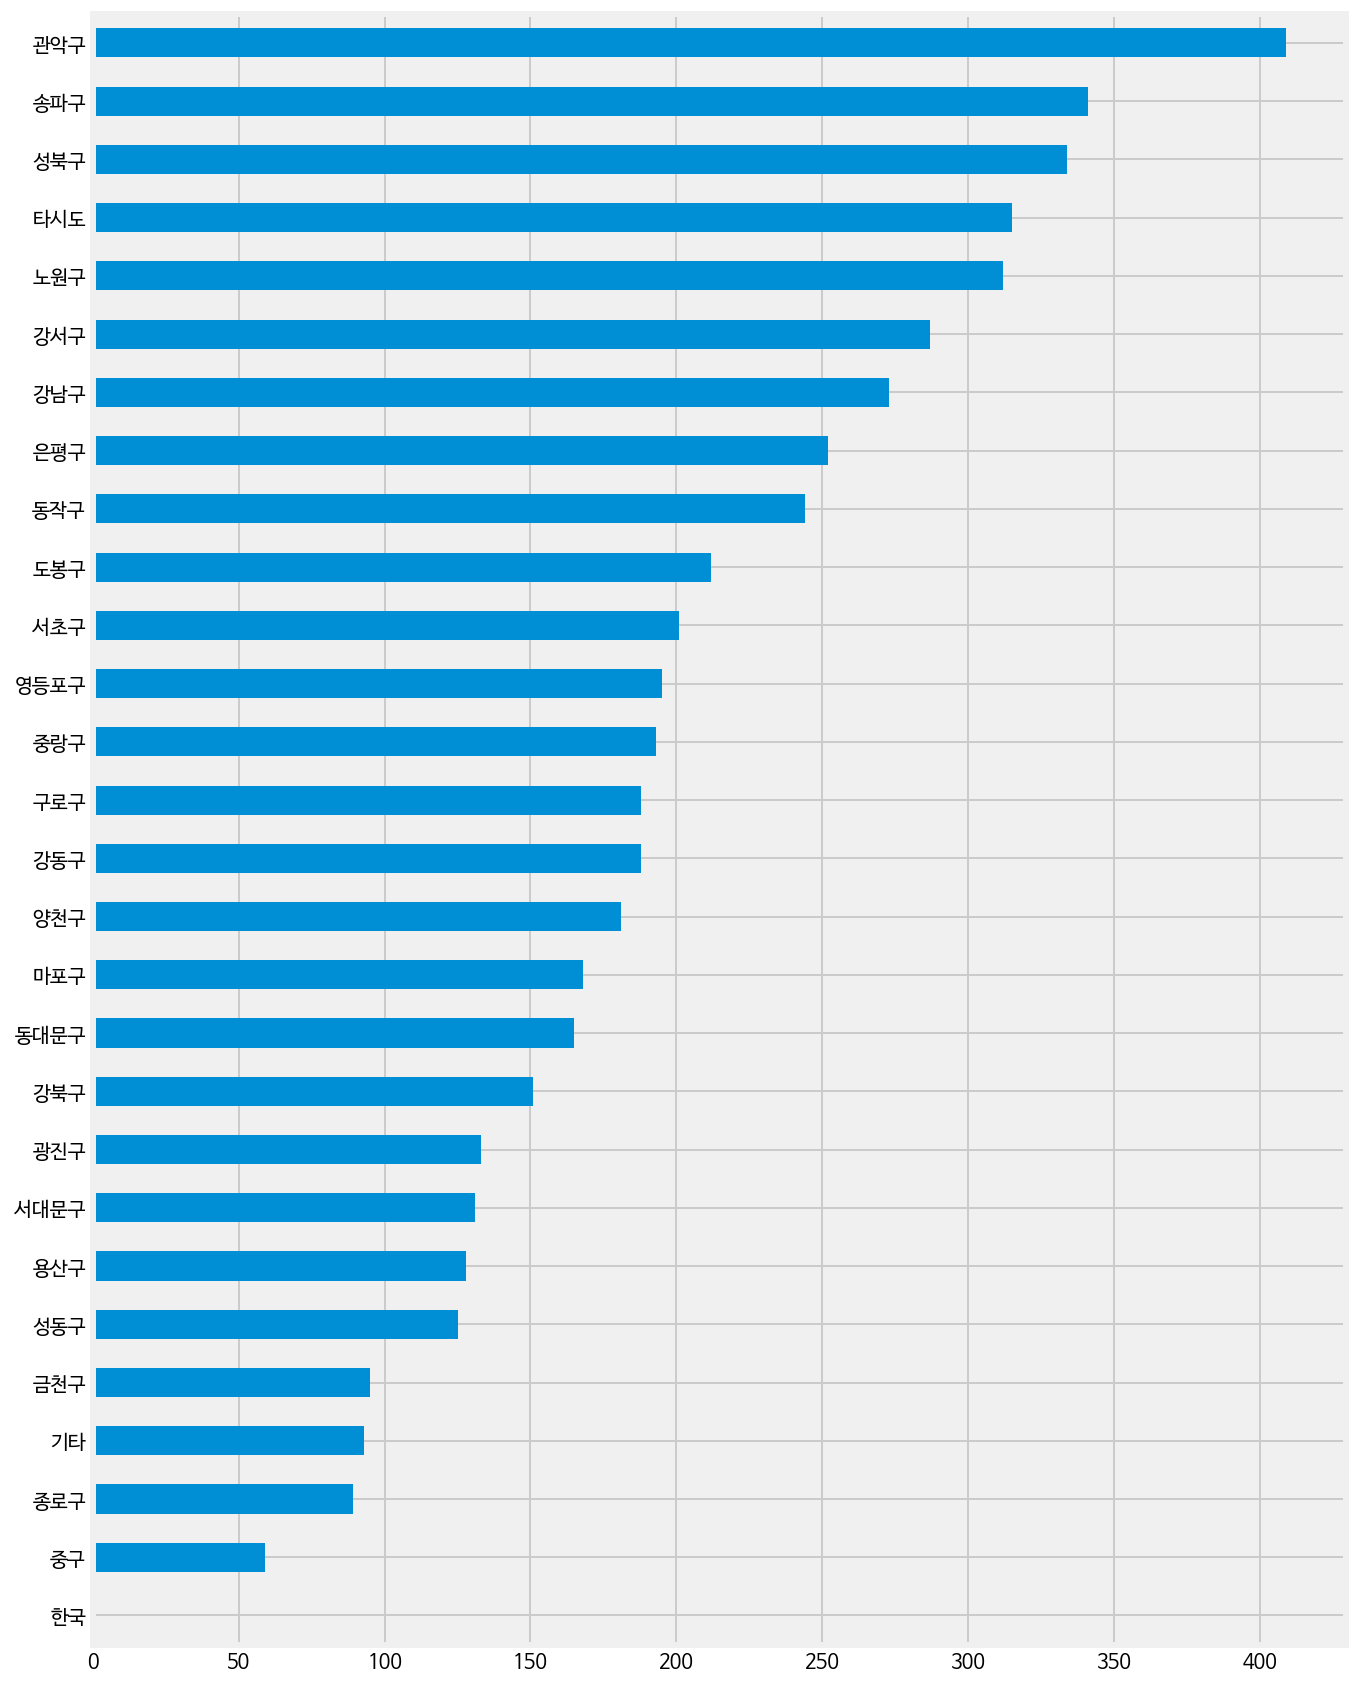

In [ ]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10,15))

In [ ]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

gu = gu_count.index[:26]
gu

Index(['관악구', '송파구', '성북구', '타시도', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구',
       '서초구', '영등포구', '중랑구', '구로구', '강동구', '양천구', '마포구', '동대문구', '강북구', '광진구',
       '서대문구', '용산구', '성동구', '금천구', '기타', '종로구'],
      dtype='object')

In [ ]:
~gu.str.contains('타시도')

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

gu = gu[~ gu.str.contains('타시도')]
gu

Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구', '서초구',
       '영등포구', '중랑구', '구로구', '강동구', '양천구', '마포구', '동대문구', '강북구', '광진구', '서대문구',
       '용산구', '성동구', '금천구', '기타', '종로구'],
      dtype='object')

In [ ]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ['구', '확진수']
df_gu

,구,확진수
0,관악구,409
1,송파구,341
2,성북구,334
3,타시도,315
4,노원구,312
5,강서구,287
6,강남구,273
7,은평구,252
8,동작구,244
9,도봉구,212


In [ ]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]

df.loc[ df['거주지'].isin(gu), '지역'] = df['거주지']
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [ ]:
df['지역'].unique()

array(['은평구', '용산구', '기타', '서대문구', '노원구', '관악구', '도봉구', '구로구', '강동구',
       '동대문구', '서초구', '성동구', '강북구', '송파구', nan, '영등포구', '강남구', '중랑구',
       '광진구', '마포구', '강서구', '금천구', '동작구', '성북구', '종로구', '양천구'],
      dtype=object)

In [ ]:
df['지역'] = df['지역'].fillna('타지역')

In [ ]:
df['지역'].unique()

array(['은평구', '용산구', '기타', '서대문구', '노원구', '관악구', '도봉구', '구로구', '강동구',
       '동대문구', '서초구', '성동구', '강북구', '송파구', '타지역', '영등포구', '강남구', '중랑구',
       '광진구', '마포구', '강서구', '금천구', '동작구', '성북구', '종로구', '양천구'],
      dtype=object)

In [ ]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.

df['지역'] = df['거주지'].map(lambda x: x if x in gu else '타지역')
df[['거주지', '지역']].tail()

,거주지,지역
5458,성북구,성북구
5459,마포구,마포구
5460,종로구,종로구
5461,중랑구,중랑구
5462,강서구,강서구


In [ ]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.

gu_etc_count = df['지역'].value_counts()
gu_etc_count

관악구     409
타지역     375
송파구     341
성북구     334
노원구     312
강서구     287
강남구     273
은평구     252
동작구     244
도봉구     212
서초구     201
영등포구    195
중랑구     193
강동구     188
구로구     188
양천구     181
마포구     168
동대문구    165
강북구     151
광진구     133
서대문구    131
용산구     128
성동구     125
금천구      95
기타       93
종로구      89
Name: 지역, dtype: int64

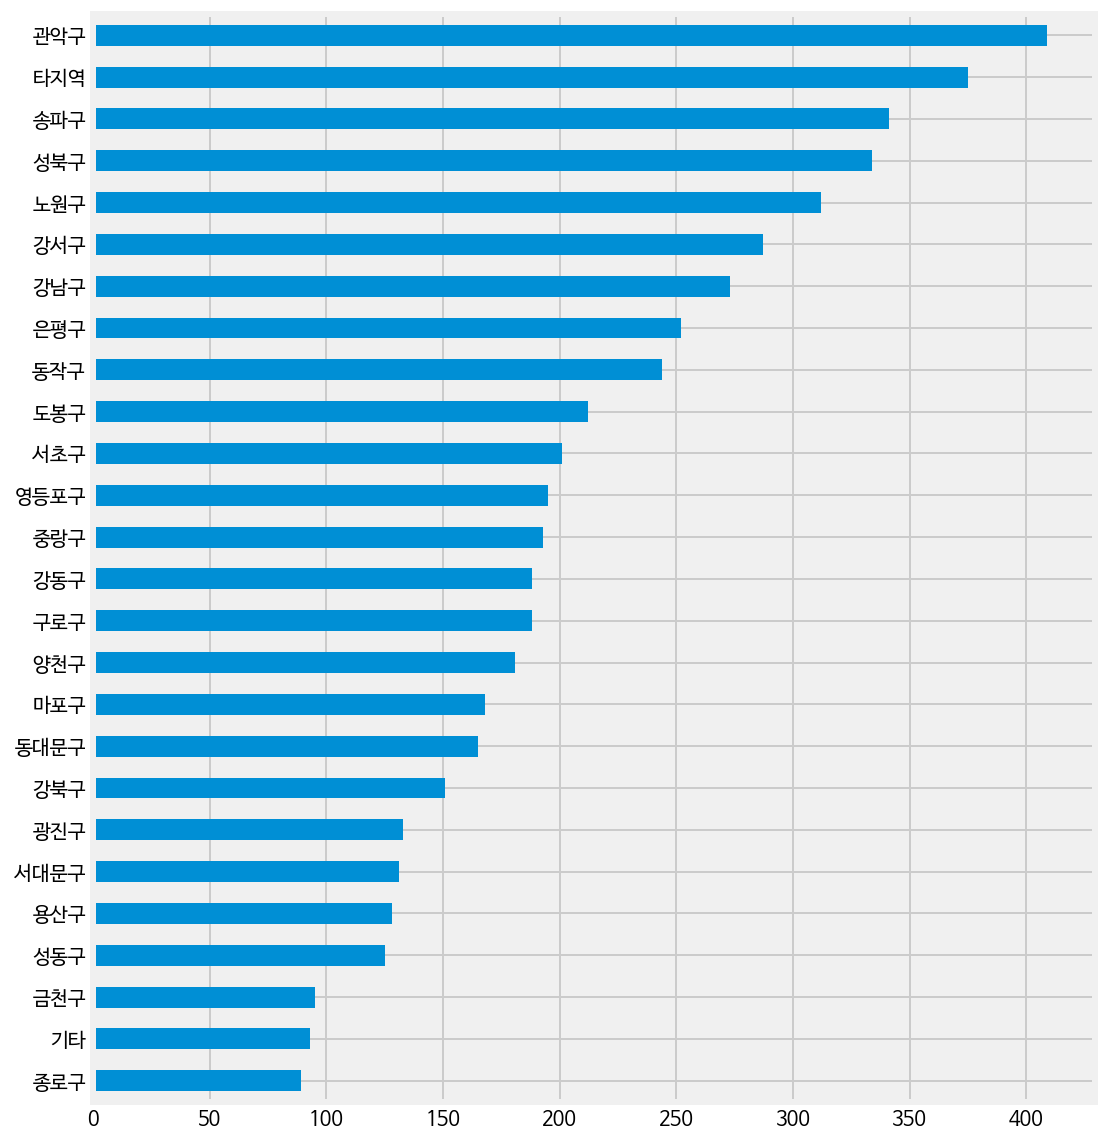

In [ ]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.

gu_etc_count.sort_values().plot.barh(figsize = (8,10))

## 접촉력

In [ ]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [ ]:
# 접촉력 빈도수를 구합니다.

df['접촉력'].value_counts()

기타 확진자 접촉        743
성북구 사랑제일교회 관련    641
확인 중             592
해외 접촉 추정         400
감염경로 조사중         327
                ... 
#9946 접촉           1
#8709 접촉 추정        1
도봉구 확진자 접촉         1
#10407 접촉          1
#6727 첩촉           1
Name: 접촉력, Length: 278, dtype: int64

In [ ]:
# 접촉력의 unique 값만 구합니다.

df['접촉력'].unique()

array(['타시도 확진자 접촉', '감염경로 조사중', '해외 접촉 추정', '기타 확진자 접촉', '관악구 큰믿음유신감리교회',
       '관악구 사랑나무 어린이집', '동대문구 성경모임', '도봉구 다나병원', '도봉구 예마루데이케어센터',
       '강북구 북서울 꿈의교회', '영등포구 방문판매업체 관련', '강남구 소재 대우디오빌플러스', '서초구 병원 관련',
       '영등포구 LG트윈타워', '서초구 소재 카페', '관악구 지인모임', '동작구 부동산 회사',
       '관악구 휘트니스 관련', '동작구 가족관련', '마포구 서울디자인 고등학교', '강남구 삼성화재',
       '양천구 양천경찰서', '서초구 LG 유플러스', '고양시부부관련', '관악구 가족 관련', '관악구 식당 관련',
       '고양시부부관련(마포구어린이집&서초구우체국)', '관악구가족 관련(가가호호데이케어센터)', '관악구 삼모스포렉스',
       '신도림 역사 관련', '강남구 디와이디벨로먼트', '송파구 우리교회', '중랑구 서울의료원', '종로구 서울대병원',
       '성동구 덕수고 야구부', '프로그래머 지인모임', '강남구 신도벤처타워', '강남구 K보건산업', '건축설명회',
       '종로구청 관련', '강남구 통신판매업', '도봉구 소재 아파트 관련', '영등포 소재 증권회사',
       '서대문구 세브란스병원', '영등포구 소재 마트 관련', '강남구 소재 금융회사', '동작구 요양시설 관련',
       '9월 송파구 지인모임', '은평구 수색성당', '서울지방국세청 관련', '수도권 지인모임', '서대문구 지인모임',
       '영등포 지인모임', '관악구 에바다 관련', '광진구 혜민병원', '8.15서울도심집회', '도봉구 건설현장',
       '도봉구 운동시설', '송파구 쿠팡 관련', '노원구 빛가온교회 관련', '서초구 장애인교육시설',
       '강동구 BF모바일 관련', '영등포구 일련정

In [ ]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[ df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중', '확인중'], dtype=object)

In [ ]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df['접촉력'].str.contains('확인'), '접촉력'] = "확인 중"

In [ ]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[ df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중'], dtype=object)

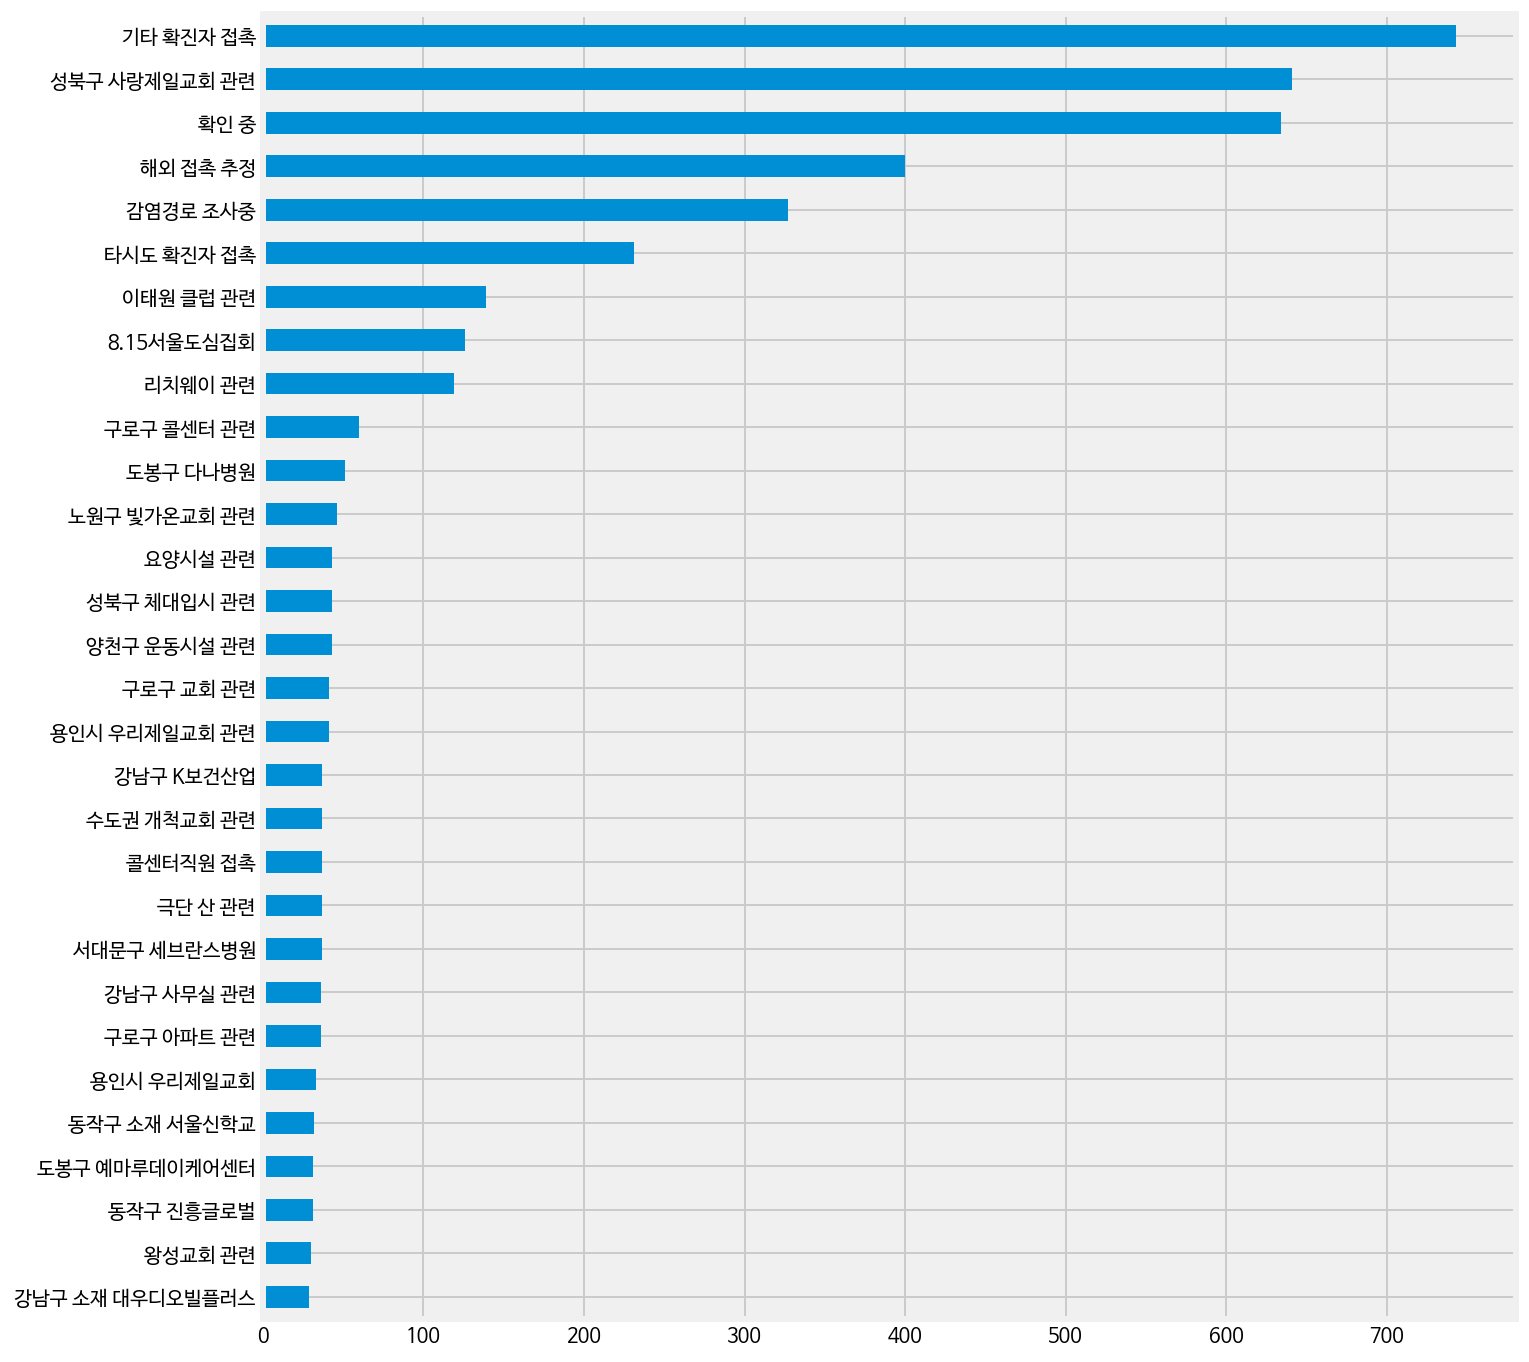

In [ ]:
# 접촉력 빈도수를 시각화 합니다.

df['접촉력'].value_counts(ascending=True).tail(30).plot.barh(figsize = (10,12))

In [ ]:
# 상위 15개만 구합니다.
df['접촉력'].value_counts().head(15)

기타 확진자 접촉        743
성북구 사랑제일교회 관련    641
확인 중             634
해외 접촉 추정         400
감염경로 조사중         327
타시도 확진자 접촉       231
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
도봉구 다나병원          51
노원구 빛가온교회 관련      46
요양시설 관련           43
성북구 체대입시 관련       43
양천구 운동시설 관련       43
Name: 접촉력, dtype: int64

In [ ]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact_index = df['접촉력'].value_counts().head(15).index
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구


In [ ]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.

top_group = df[df['접촉력'].isin(top_contact_index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구


In [ ]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(['접촉력','월'])['연번'].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9,10
접촉력,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0
감염경로 조사중,0,0,0,0,0,0,10,284,33
구로구 콜센터 관련,0,60,0,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,0,417,309,17
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11,0
도봉구 다나병원,0,0,0,0,0,0,0,33,18
리치웨이 관련,0,0,0,0,119,0,0,0,0
성북구 사랑제일교회 관련,0,0,0,0,0,0,628,13,0
성북구 체대입시 관련,0,0,0,0,0,0,39,4,0


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [ ]:
df[df['접촉력'].str.contains('이태원') & (df['월']==6)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4483,980,11785,6.06.,관악구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,관악구
4498,965,11742,6.06.,영등포구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,영등포구
4507,956,11751,6.06.,용산구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,용산구
4514,949,11709,6.05.,송파구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,송파구
4529,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
4587,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


In [ ]:
df[df['접촉력'].str.contains('이태원') & (df['월']==6) & (df['지역']=='성동구')]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4529,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구


In [ ]:
df[df['월']==6]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4139,1324,12856,6.30.,서초구,-,강남역삼동 금융회사,퇴원,2020-06-30,6,27,06-30,서초구
4142,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,퇴원,2020-06-30,6,27,06-30,영등포구
4143,1320,12829,6.30.,관악구,-,확인 중,퇴원,2020-06-30,6,27,06-30,관악구
4144,1319,12831,6.30.,영등포구,-,확인 중,퇴원,2020-06-30,6,27,06-30,영등포구
4145,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,퇴원,2020-06-30,6,27,06-30,관악구
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,867,11528,6.01.,영등포구,-,확인 중,퇴원,2020-06-01,6,23,06-01,영등포구
4597,866,11524,6.01.,영등포구,-,수도권 개척교회 관련,퇴원,2020-06-01,6,23,06-01,영등포구
4598,865,11512,6.01.,강서구,-,수도권 개척교회 관련,퇴원,2020-06-01,6,23,06-01,강서구
4599,864,11513,6.01.,강서구,-,수도권 개척교회 관련,퇴원,2020-06-01,6,23,06-01,강서구


### 감염경로 불명

In [ ]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df['접촉력']=='확인 중']
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
1505,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36,08-31,양천구
1506,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36,08-31,은평구
1507,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36,08-31,용산구
1511,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36,08-31,도봉구
1517,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36,08-31,타지역


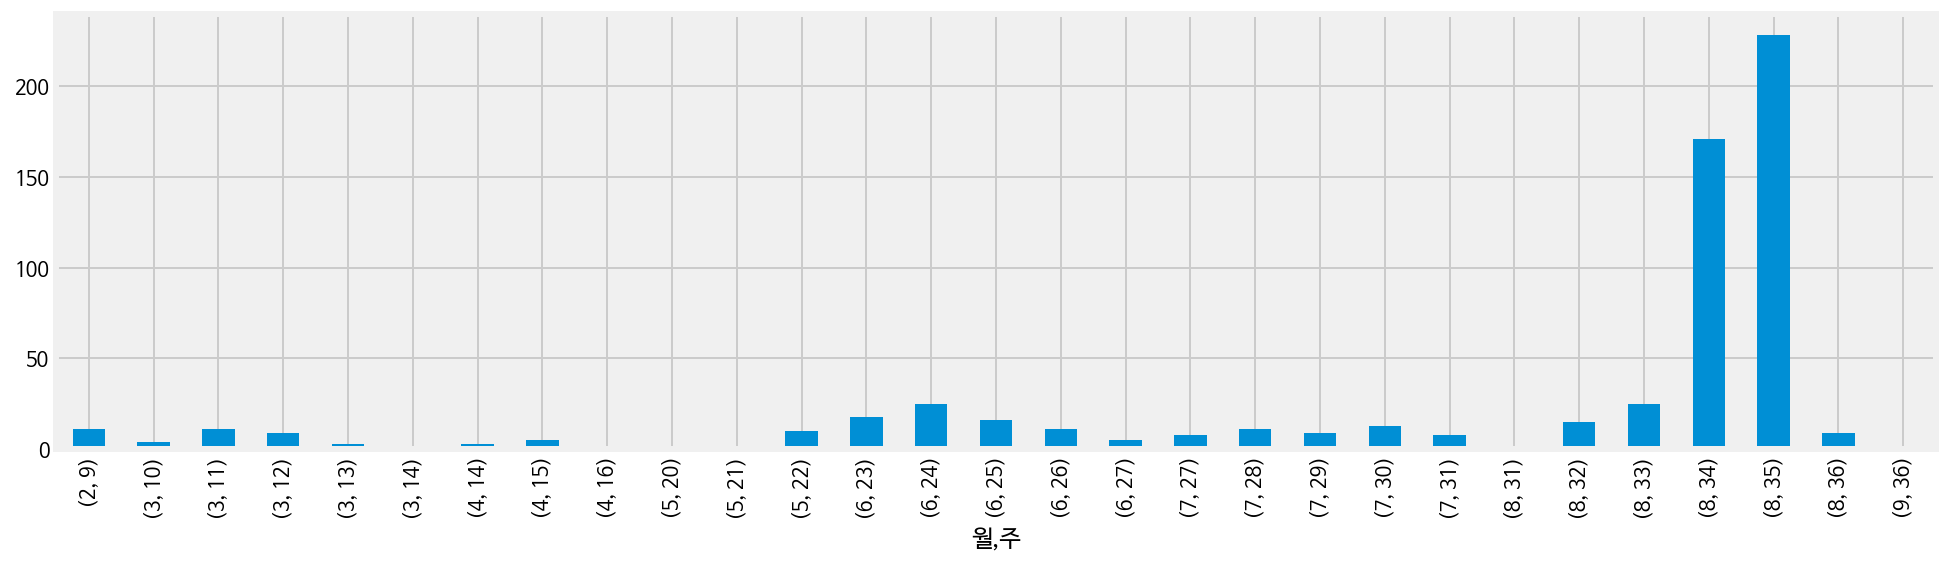

In [ ]:
# 감염경로 불명이 어느정도인지 봅니다.
unkown_weekly_case = df_unknown.groupby(['월','주'])['연번'].count()
unkown_weekly_case.plot.bar(figsize = (15,4))

In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case

all_weekly_case = df['주'].value_counts().to_frame()
df['주'].value_counts()

35    924
34    913
36    458
33    390
37    341
38    281
39    236
40    164
23    134
14    128
24    125
11    124
25    106
13    105
30     97
22     87
26     78
12     76
32     76
41     68
27     67
9      62
28     57
19     51
29     48
20     48
15     47
21     39
31     38
10     37
8      17
16     15
18      8
5       7
6       4
17      4
7       2
4       1
Name: 주, dtype: int64

In [ ]:
all_weekly_case

,주
35,924
34,913
36,458
33,390
37,341
38,281
39,236
40,164
23,134
14,128


In [ ]:
unknown_weekly_case

,불명확진수
35,228
34,171
24,25
33,25
23,18
25,16
32,15
30,13
27,13
26,11


In [ ]:
all_weekly_case.columns = ['전체확진수']

In [ ]:
# 불명 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case

unknown_weekly_case = df_unknown['주'].value_counts().to_frame()
unknown_weekly_case.columns = ['불명확진수']
unknown_weekly_case.head()

,불명확진수
35,228
34,171
24,25
33,25
23,18


In [ ]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)
unknown_case = unknown_case.sort_index()
unknown_case

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


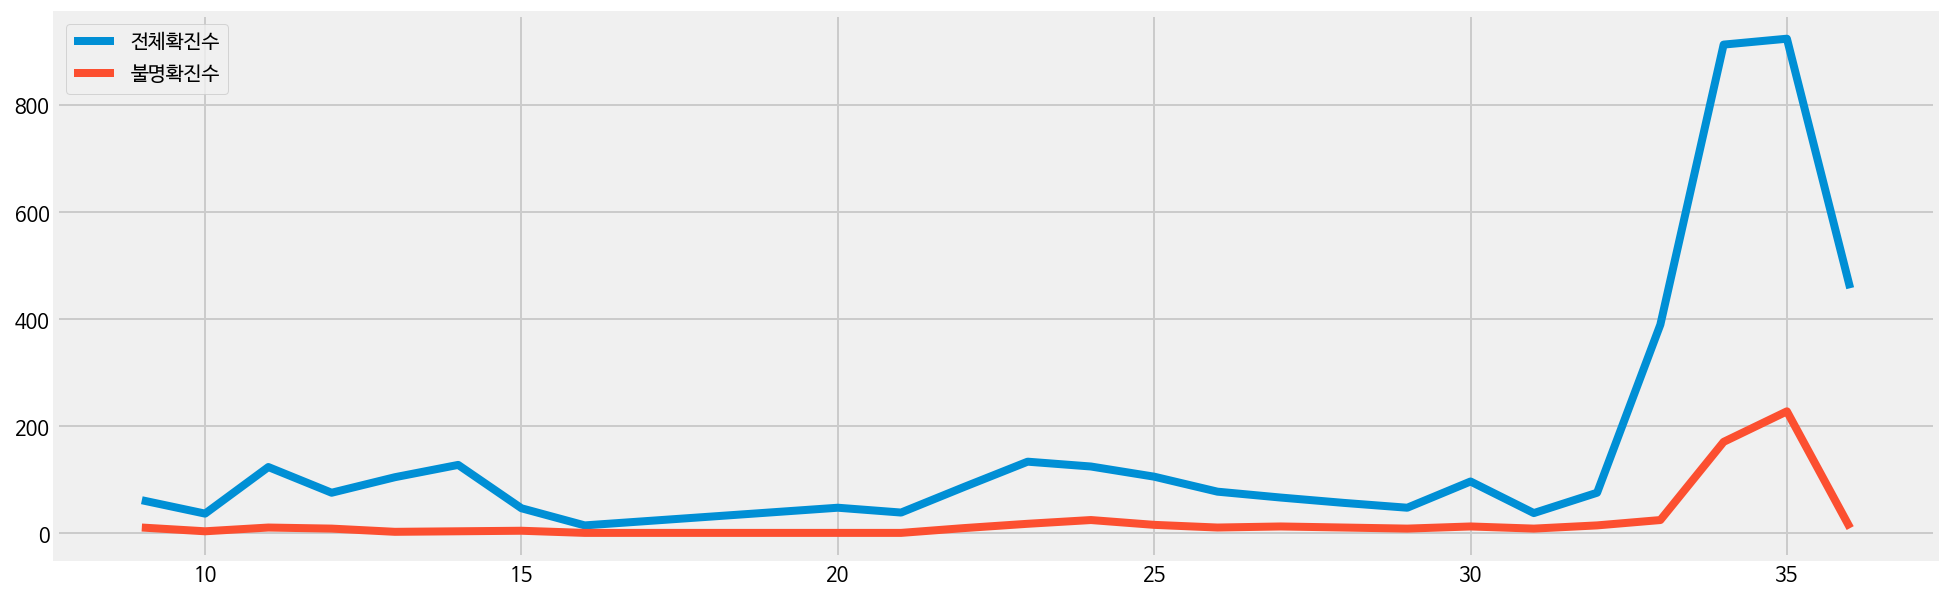

In [ ]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize = (15,5))

In [ ]:
# 감염경로 "확인 중"의 주별 비율

unknown_case['비율'] = (unknown_case['불명확진수'] / unknown_case['전체확진수']) * 100
unknown_case

,전체확진수,불명확진수,비율
9,62,11,17.741935
10,37,4,10.810811
11,124,11,8.870968
12,76,9,11.842105
13,105,3,2.857143
14,128,4,3.125000
15,47,5,10.638298
16,15,1,6.666667
20,48,1,2.083333
21,39,1,2.564103


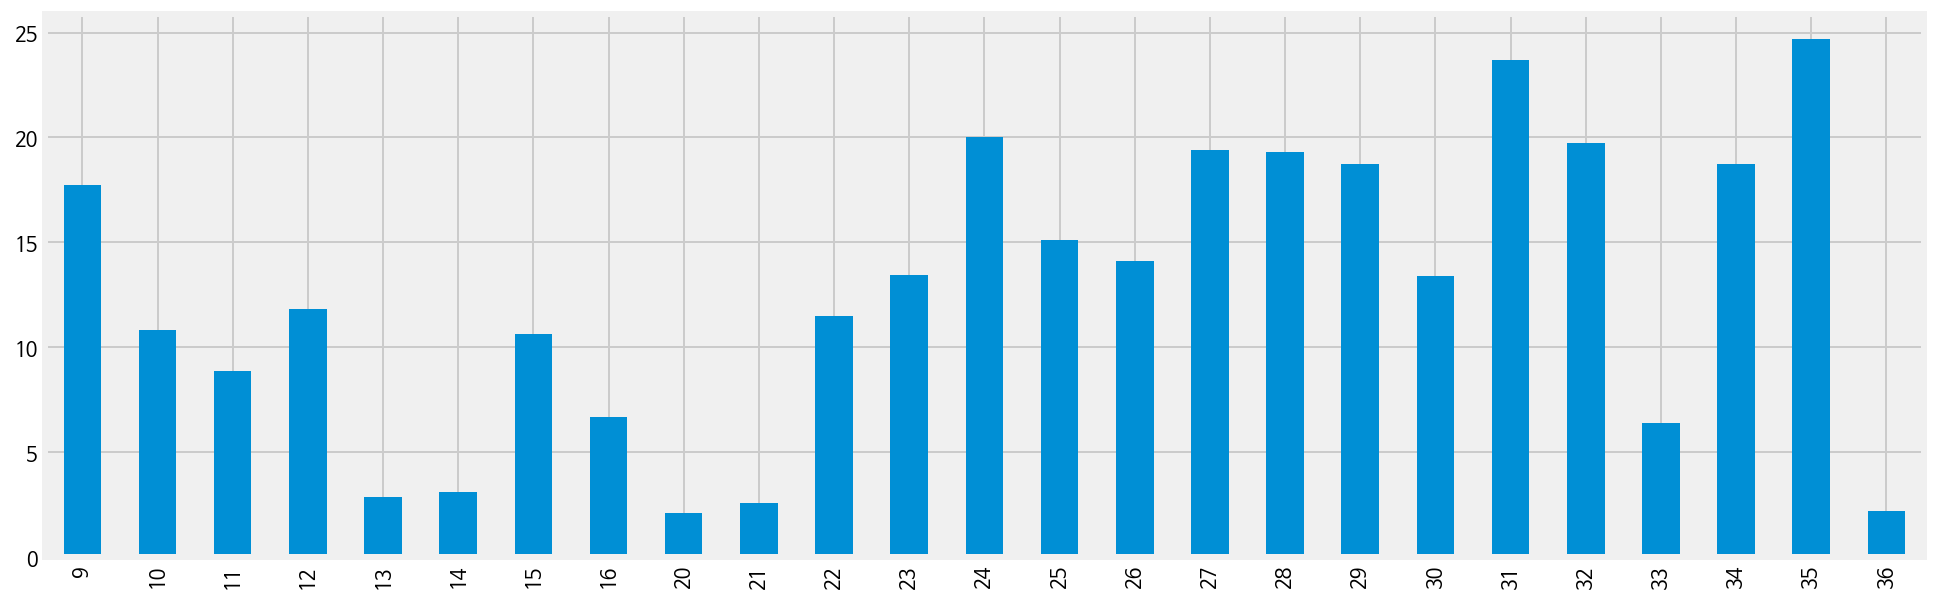

In [ ]:
unknown_case['비율'].plot.bar(figsize = (15,5))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [ ]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구


In [ ]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
  return re.sub("[^0-9]","", text)


get_number('#7265 접촉(추정)')

'7265'

In [ ]:
# 함수를 map을 통해 접촉번호를 구합니다.

df['접촉번호'] = df['접촉력'].map(get_number)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,


In [ ]:
contact = df['접촉번호'].value_counts().reset_index()
contact

,index,접촉번호
0,,5244
1,815,126
2,9734,4
3,6,4
4,9,4
...,...,...
61,56,1
62,9219,1
63,7500,1
64,8881,1


In [ ]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact

,index,접촉번호
1,815,126
2,9734,4
3,6,4
4,9,4
5,8791,3
...,...,...
61,56,1
62,9219,1
63,7500,1
64,8881,1


In [ ]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact['index'][:10]
top_contact_no

1       815
2      9734
3         6
4         9
5      8791
6      8271
7      8486
8     14483
9       780
10    10044
Name: index, dtype: object

In [ ]:
df[df['접촉번호'].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
503,4960,22951,9.19.,송파구,-,9월 송파구 지인모임,NaN,2020-09-19,9,38,09-19,송파구,9
570,4893,22755,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
571,4892,22756,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
572,4891,22757,9.17.,송파구,-,9월 송파구 지인모임,NaN,2020-09-17,9,38,09-17,송파구,9
789,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5430,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
5446,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,종로구,6
5453,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
5456,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,종로구,6


In [ ]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구,5
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,


## 퇴원, 사망여부

In [ ]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df['퇴원'] = df['퇴원현황'].str.contains('퇴원')
df['사망'] = df['퇴원현황'].str.contains('사망')

In [ ]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,,NaN,NaN
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,,NaN,NaN
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,,NaN,NaN
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,,NaN,NaN
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,,NaN,NaN


In [ ]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구,5,True,False
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3,True,False
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False
5462,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,2020-01-24,1,4,01-24,강서구,,True,False


In [ ]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df['퇴원'].value_counts()

True     4810
False      62
Name: 퇴원, dtype: int64

In [ ]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df['퇴원'].value_counts(normalize=True)

True     0.987274
False    0.012726
Name: 퇴원, dtype: float64

In [ ]:
# 사망여부에 따른 빈도수를 구합니다.

df['사망'].value_counts()

False    4810
True       62
Name: 사망, dtype: int64

In [ ]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df['사망'].value_counts(normalize=True) *100

False    98.727422
True      1.272578
Name: 사망, dtype: float64

* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [ ]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

df[(df['퇴원']==False) & (df['사망']==False) & (df['지역'] != '타지역')]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망


## 병원

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수



In [ ]:
# 병원의 빈도수를 구합니다.



In [ ]:
# 병원별 빈도수를 막대그래프로 표현합니다.



In [ ]:
# 입원환자가 많은 병원을 구합니다.



### iloc 로 일부 데이터만 보기

In [ ]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.



### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

### pandas style 적용하기

In [ ]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.


## 여행력

In [ ]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]


df['해외'] = df['여행력']
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,,NaN,NaN,-
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,,NaN,NaN,-
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,,NaN,NaN,미국
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,,NaN,NaN,-
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구,5,True,False,-
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False,중국 우한시
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3,True,False,-
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False,중국 우한시


In [ ]:
df['해외'] = df['해외'].str.strip()
df['해외'] = df['해외'].replace("_",np.nan)
df['해외'].nunique()

81

In [ ]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,,NaN,NaN,-
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,,NaN,NaN,-
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,,NaN,NaN,미국
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,,NaN,NaN,-
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구,5,True,False,-
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False,중국 우한시
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3,True,False,-
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False,중국 우한시


In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


In [ ]:
df['해외'].describe()

count     5463
unique      81
top          -
freq      5034
Name: 해외, dtype: object

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [ ]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.

df_oversea = df[df['해외'].notnull()].copy()
df_oversea.shape

(5463, 16)

In [ ]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,,NaN,NaN,-
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,,NaN,NaN,-
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,,NaN,NaN,미국
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,,NaN,NaN,-
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구,5,True,False,-
5459,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구,,True,False,중국 우한시
5460,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구,3,True,False,-
5461,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구,,True,False,중국 우한시


In [ ]:
df_oversea['해외'].unique()

array(['-', '미국', '프랑스', '우간다', '일본', '몰타', '영국', '체코', '인도네시아', '네팔',
       '인도', '우즈베키스탄', '카타르', '우크라이나', '필리핀', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코, 미국', '카자흐스탄', '독일', '중국', '이집트', '21263', '터키', '사우디아라비아',
       '베트남', '에티오피아', '스페인', '케냐', '방글라데시', '멕시코', '홍콩', '러시아', '이라크',
       '키르기스스탄', '모로코, 터키', '쿠웨이트', '나이지리아', '미국, 멕시코', '페루', '아랍에미리트',
       'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼',
       '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [ ]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드, 네덜란드, 포르투칼"

europe = europe.replace(', ', '|')
print(europe)
df_oversea[df_oversea['해외'].str.contains(europe)]

체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드|네덜란드|포르투칼


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
21,5442,24321,10.06.,용산구,프랑스,해외 접촉 추정,NaN,2020-10-06,10,41,10-06,용산구,,NaN,NaN,프랑스
58,5405,24208,10.05.,구로구,영국,해외 접촉 추정,NaN,2020-10-05,10,41,10-05,구로구,,NaN,NaN,영국
65,5398,24215,10.05.,강서구,체코,해외 접촉 추정,NaN,2020-10-05,10,41,10-05,강서구,,NaN,NaN,체코
288,5175,23501,9.25.,서초구,체코,해외 접촉 추정,NaN,2020-09-25,9,39,09-25,서초구,,NaN,NaN,체코
1641,3822,19817,8.29.,기타,영국,해외 접촉 추정,퇴원,2020-08-29,8,35,08-29,기타,,True,False,영국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5272,191,7647,3.10.,은평구,"프랑스, 스페인",#6959 접촉(추정),퇴원,2020-03-10,3,11,03-10,은평구,6959,True,False,"프랑스, 스페인"
5347,116,6999,3.7.,서초구,"스페인, 프랑스",해외 접촉,퇴원,2020-03-07,3,10,03-07,서초구,,True,False,"스페인, 프랑스"
5360,103,5666,3.4.,용산구,"이탈리아, 독일, 홍콩",해외 접촉,퇴원,2020-03-04,3,10,03-04,용산구,,True,False,"이탈리아, 독일, 홍콩"
5378,85,3681,2.29.,강남구,이탈리아,해외 접촉,퇴원,2020-02-29,2,9,02-29,강남구,,True,False,이탈리아


In [ ]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(', ', '|')
df_oversea[df_oversea['해외'].str.contains(south_america)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
1438,4025,20347,9.01.,강남구,"멕시코, 미국",해외 접촉 추정,퇴원,2020-09-01,9,36,09-01,강남구,,True,False,"멕시코, 미국"
3789,1674,14591,8.8.,기타,멕시코,해외 접촉 추정,퇴원,2020-08-08,8,32,08-08,기타,,True,False,멕시코
3884,1579,14202,7.27.,타시도,멕시코,해외 접촉 추정,퇴원,2020-07-27,7,31,07-27,타지역,,True,False,멕시코
3985,1478,13791,7.20.,서대문구,"미국, 멕시코",해외 접촉 추정,퇴원,2020-07-20,7,30,07-20,서대문구,,True,False,"미국, 멕시코"
4083,1380,13206,7.07.,마포구,페루,해외 접촉 추정,퇴원,2020-07-07,7,28,07-07,마포구,,True,False,페루
4084,1379,13205,7.07.,마포구,페루,해외 접촉 추정,퇴원,2020-07-07,7,28,07-07,마포구,,True,False,페루
4085,1378,13207,7.07.,마포구,페루,해외 접촉 추정,퇴원,2020-07-07,7,28,07-07,마포구,,True,False,페루
4266,1197,12362,6.19.,동대문구,멕시코,해외 접촉 추정,퇴원,2020-06-19,6,25,06-19,동대문구,,True,False,멕시코
4601,862,11481,5.31.,강남구,멕시코,해외 접촉 추정,퇴원,2020-05-31,5,22,05-31,강남구,,True,False,멕시코
4652,811,11291,5.27.,서대문구,멕시코,해외 접촉 추정,퇴원,2020-05-27,5,22,05-27,서대문구,,True,False,멕시코


In [ ]:
df_oversea['해외'].unique()

array(['-', '미국', '프랑스', '우간다', '일본', '몰타', '영국', '체코', '인도네시아', '네팔',
       '인도', '우즈베키스탄', '카타르', '우크라이나', '필리핀', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코, 미국', '카자흐스탄', '독일', '중국', '이집트', '21263', '터키', '사우디아라비아',
       '베트남', '에티오피아', '스페인', '케냐', '방글라데시', '멕시코', '홍콩', '러시아', '이라크',
       '키르기스스탄', '모로코, 터키', '쿠웨이트', '나이지리아', '미국, 멕시코', '페루', '아랍에미리트',
       'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼',
       '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [ ]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.

df_oversea.loc[df_oversea['해외'].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea['해외'].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea['해외'].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea['해외'].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea['해외'].value_counts()

-            5034
미국            145
유럽            108
필리핀            24
남미             22
우즈베키스탄         12
카자흐스탄          10
이라크            10
중국              9
일본              9
인도              9
태국              6
인도네시아           6
UAE             5
캐나다             5
러시아             5
파키스탄            4
키르기스스탄          4
네팔              3
베트남             3
필리핀, 마닐라        2
팔라우             2
에콰도르            2
방글라데시           2
이집트             2
사우디아라비아         2
우크라이나           2
카타르             1
미국, 캐나다         1
키르기즈스탄          1
21263           1
쿠웨이트            1
몰타              1
말레이시아           1
미국 뉴욕           1
파라과이            1
나이지리아           1
에티오피아           1
홍콩              1
우간다             1
싱가포르            1
케냐              1
호주, 인도네시아       1
Name: 해외, dtype: int64

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df_oversea['해외'].describe()

count     5463
unique      43
top          -
freq      5034
Name: 해외, dtype: object

In [ ]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(['확진일자', '해외'])['연번'].count()
day_oversea

확진일자        해외 
2020-01-24  중국      1
2020-01-30  -       1
            중국      2
2020-01-31  -       3
2020-02-02  중국      1
                   ..
2020-10-06  우간다     1
            유럽      1
            일본      1
2020-10-07  -      19
            미국      1
Name: 연번, Length: 484, dtype: int64

In [ ]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외 
2020-01-24  중국        1
2020-01-30  -         1
            중국        3
2020-01-31  -         4
2020-02-02  중국        4
                   ... 
2020-10-06  우간다       1
            유럽      108
            일본        9
2020-10-07  -      5034
            미국      145
Name: 연번, Length: 484, dtype: int64

In [ ]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()

In [ ]:
df_day_oversea = df_day_oversea.rename(columns = {'연번':'누적확진자수'})
df_day_oversea

,확진일자,해외,누적확진자수
0,2020-01-24,중국,1
1,2020-01-30,-,1
2,2020-01-30,중국,3
3,2020-01-31,-,4
4,2020-02-02,중국,4
...,...,...,...
479,2020-10-06,우간다,1
480,2020-10-06,유럽,108
481,2020-10-06,일본,9
482,2020-10-07,-,5034


In [ ]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea['해외'].value_counts()

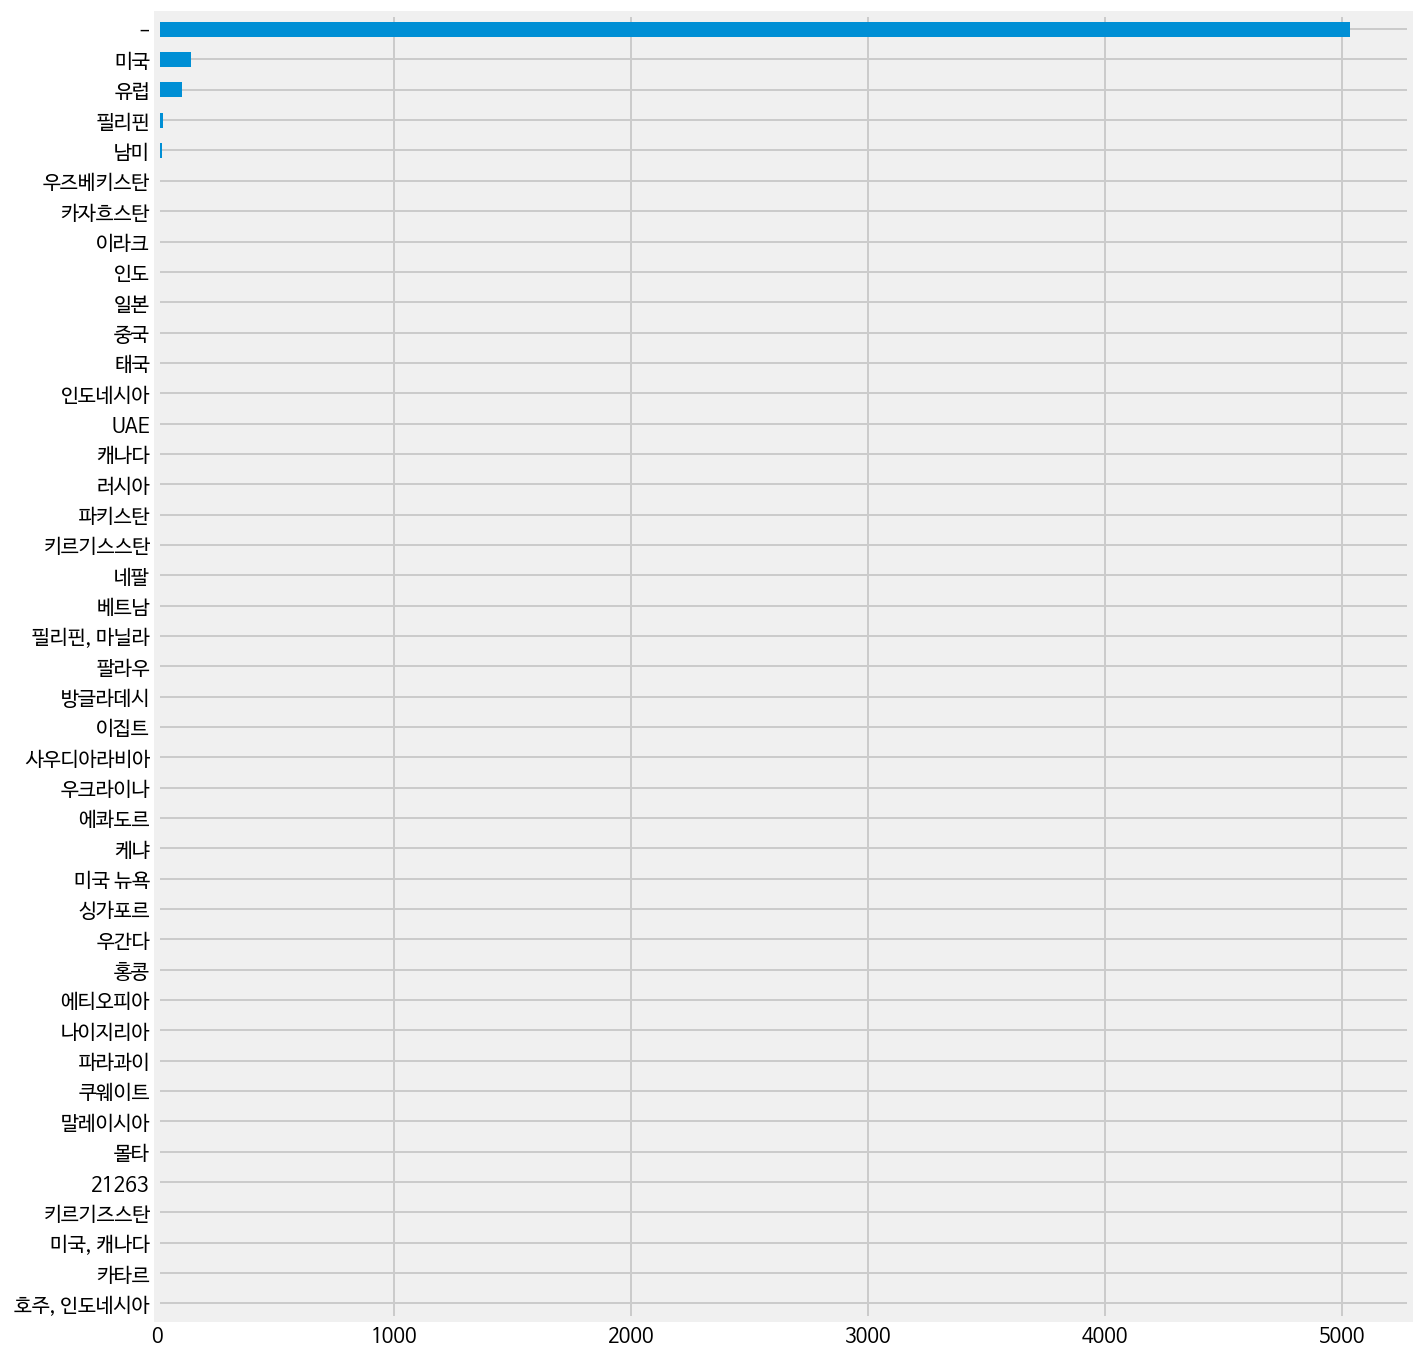

In [ ]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize = (10,12))

In [ ]:
df_day_oversea = df_day_oversea.set_index('확진일자')
df_day_oversea

,해외,누적확진자수
확진일자,,
2020-01-24,중국,1
2020-01-30,-,1
2020-01-30,중국,3
2020-01-31,-,4
2020-02-02,중국,4
...,...,...
2020-10-06,우간다,1
2020-10-06,유럽,108
2020-10-06,일본,9


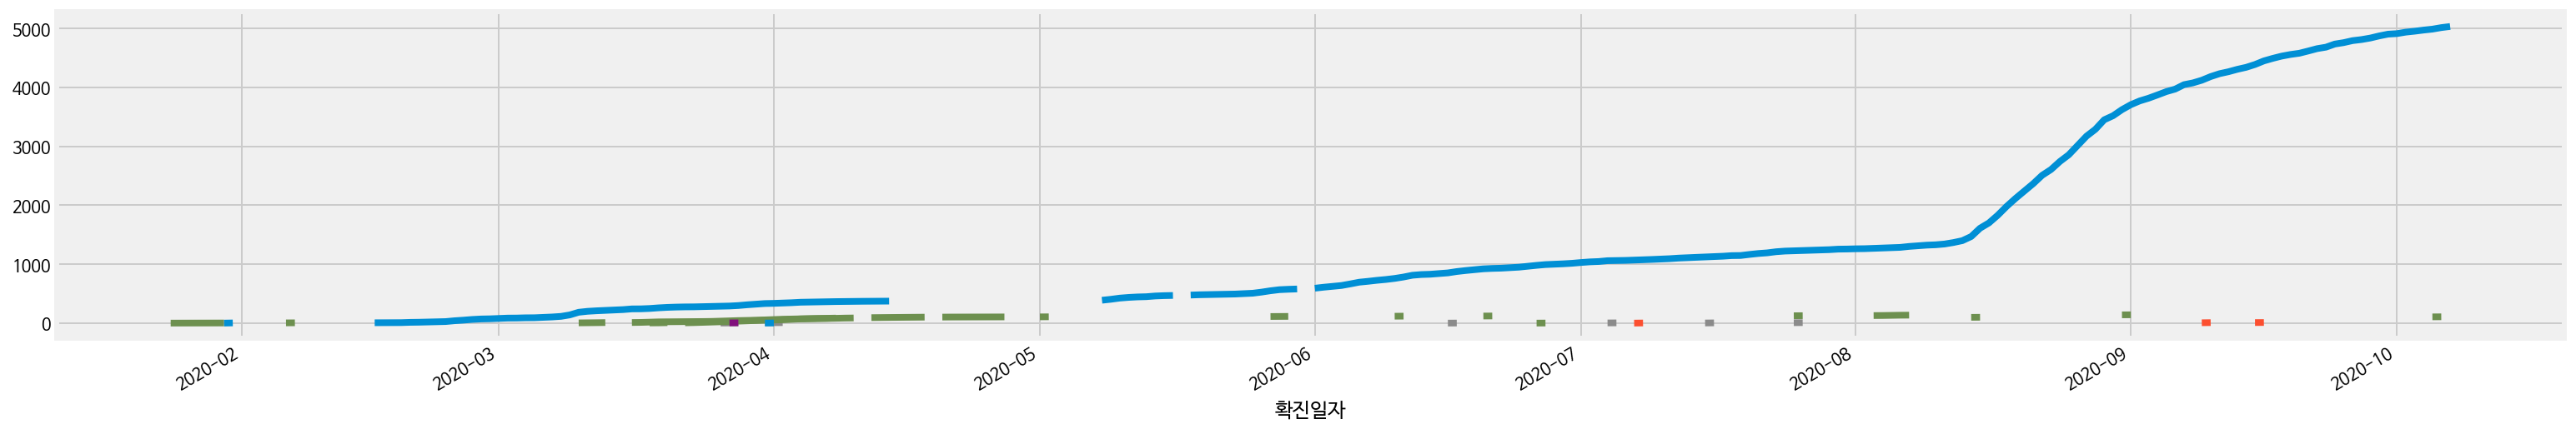

In [ ]:
df_day_oversea.pivot(columns='해외').plot(figsize=(24,4), legend=False)

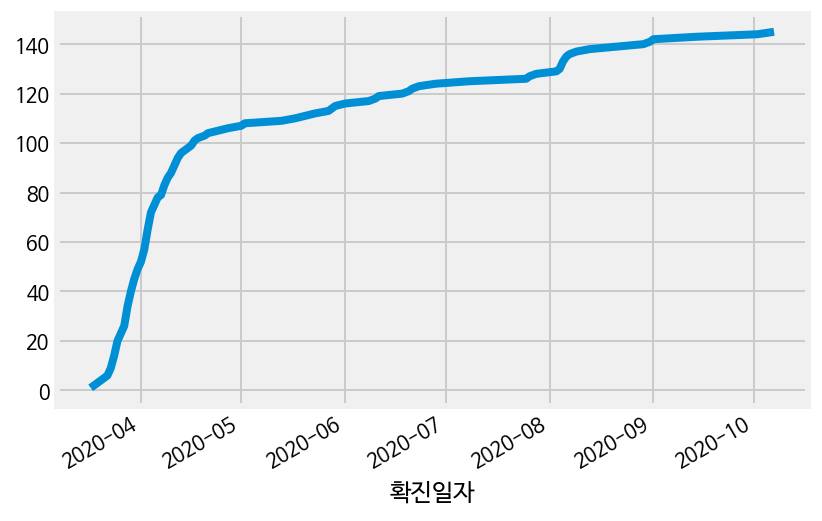

In [ ]:
df_day_oversea.loc[df_day_oversea['해외']=='미국', '누적확진자수'].plot()

In [ ]:
df_oversea['지역'].value_counts()

관악구     409
타지역     375
송파구     341
성북구     334
노원구     312
강서구     287
강남구     273
은평구     252
동작구     244
도봉구     212
서초구     201
영등포구    195
중랑구     193
강동구     188
구로구     188
양천구     181
마포구     168
동대문구    165
강북구     151
광진구     133
서대문구    131
용산구     128
성동구     125
금천구      95
기타       93
종로구      89
Name: 지역, dtype: int64

In [ ]:
oversea_count_gu = df_oversea['지역'].value_counts()

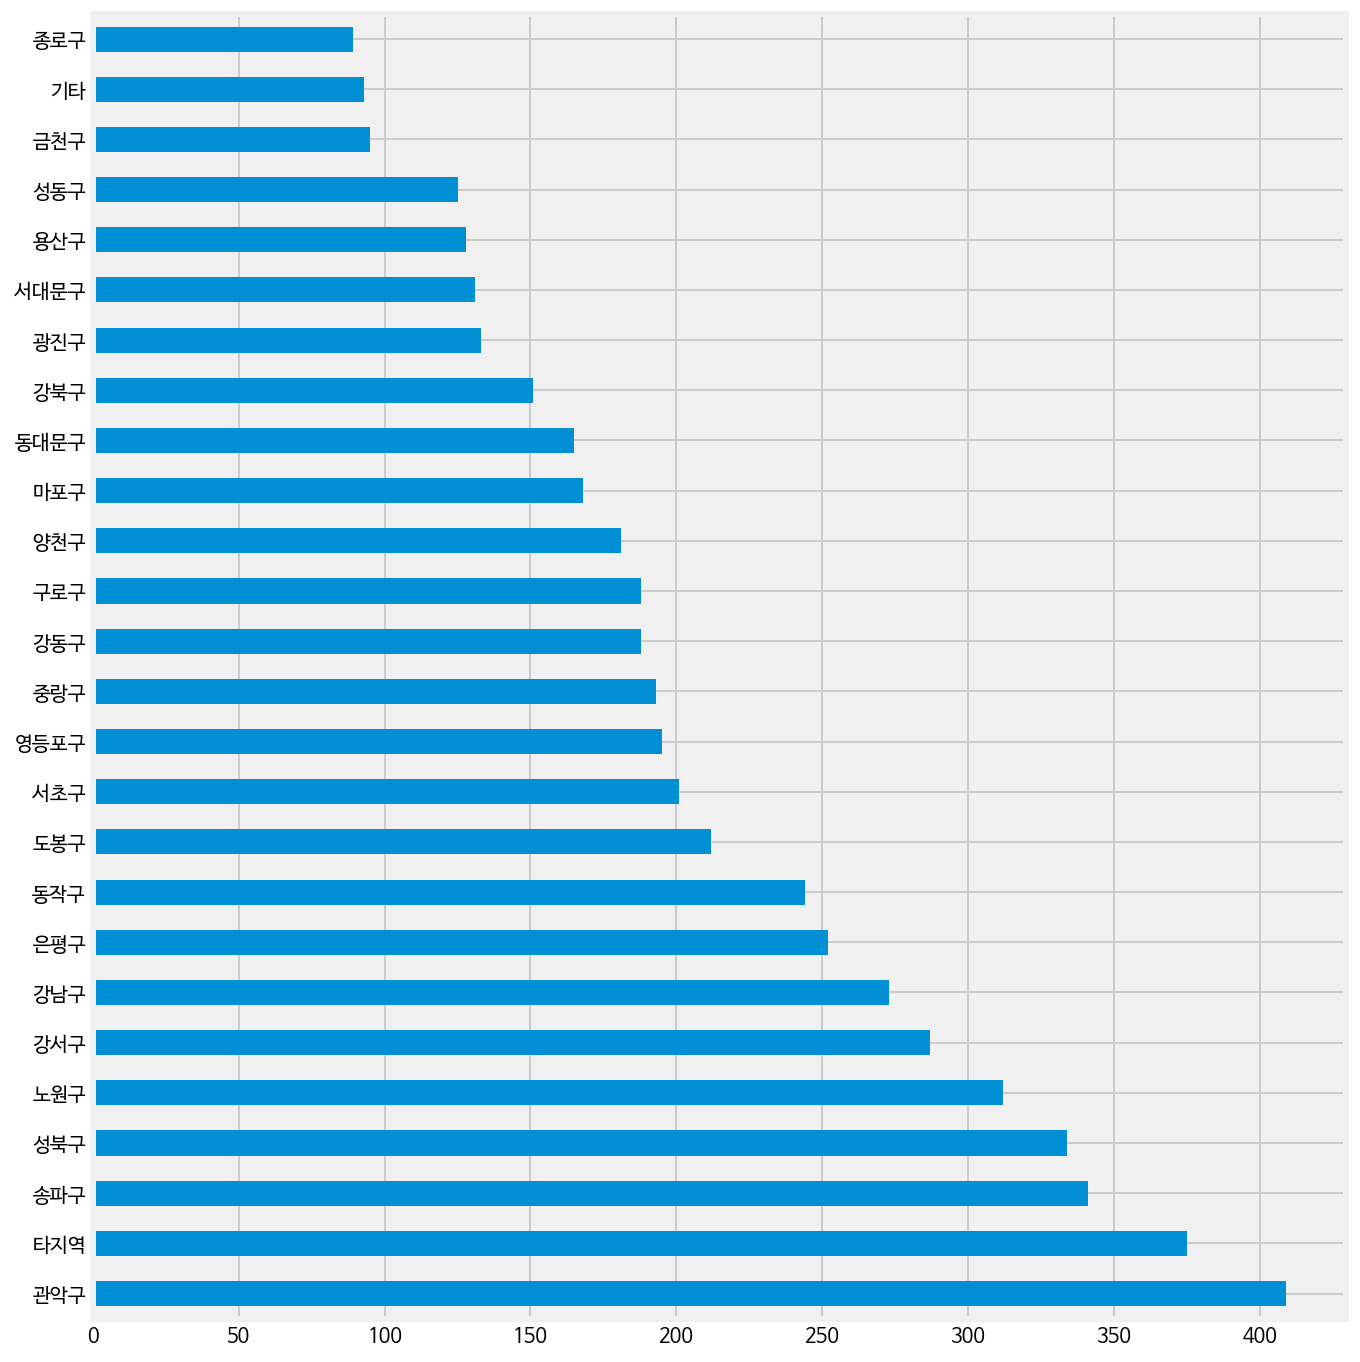

In [ ]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.plot.barh(figsize=(10,12))

### 전체확진수와 해외유입 확진수 비교

In [ ]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df['지역'].value_counts()

In [ ]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ['지역']

In [ ]:
df_all_gu.columns = ['전체확진자수']

In [ ]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({'해외유입확진자수': oversea_count_gu})
df_oversea_gu

,해외유입확진자수
관악구,409
타지역,375
송파구,341
성북구,334
노원구,312
강서구,287
강남구,273
은평구,252
동작구,244
도봉구,212


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case

,전체확진자수,해외유입확진자수
관악구,409,409
타지역,375,375
송파구,341,341
성북구,334,334
노원구,312,312
강서구,287,287
강남구,273,273
은평구,252,252
동작구,244,244
도봉구,212,212


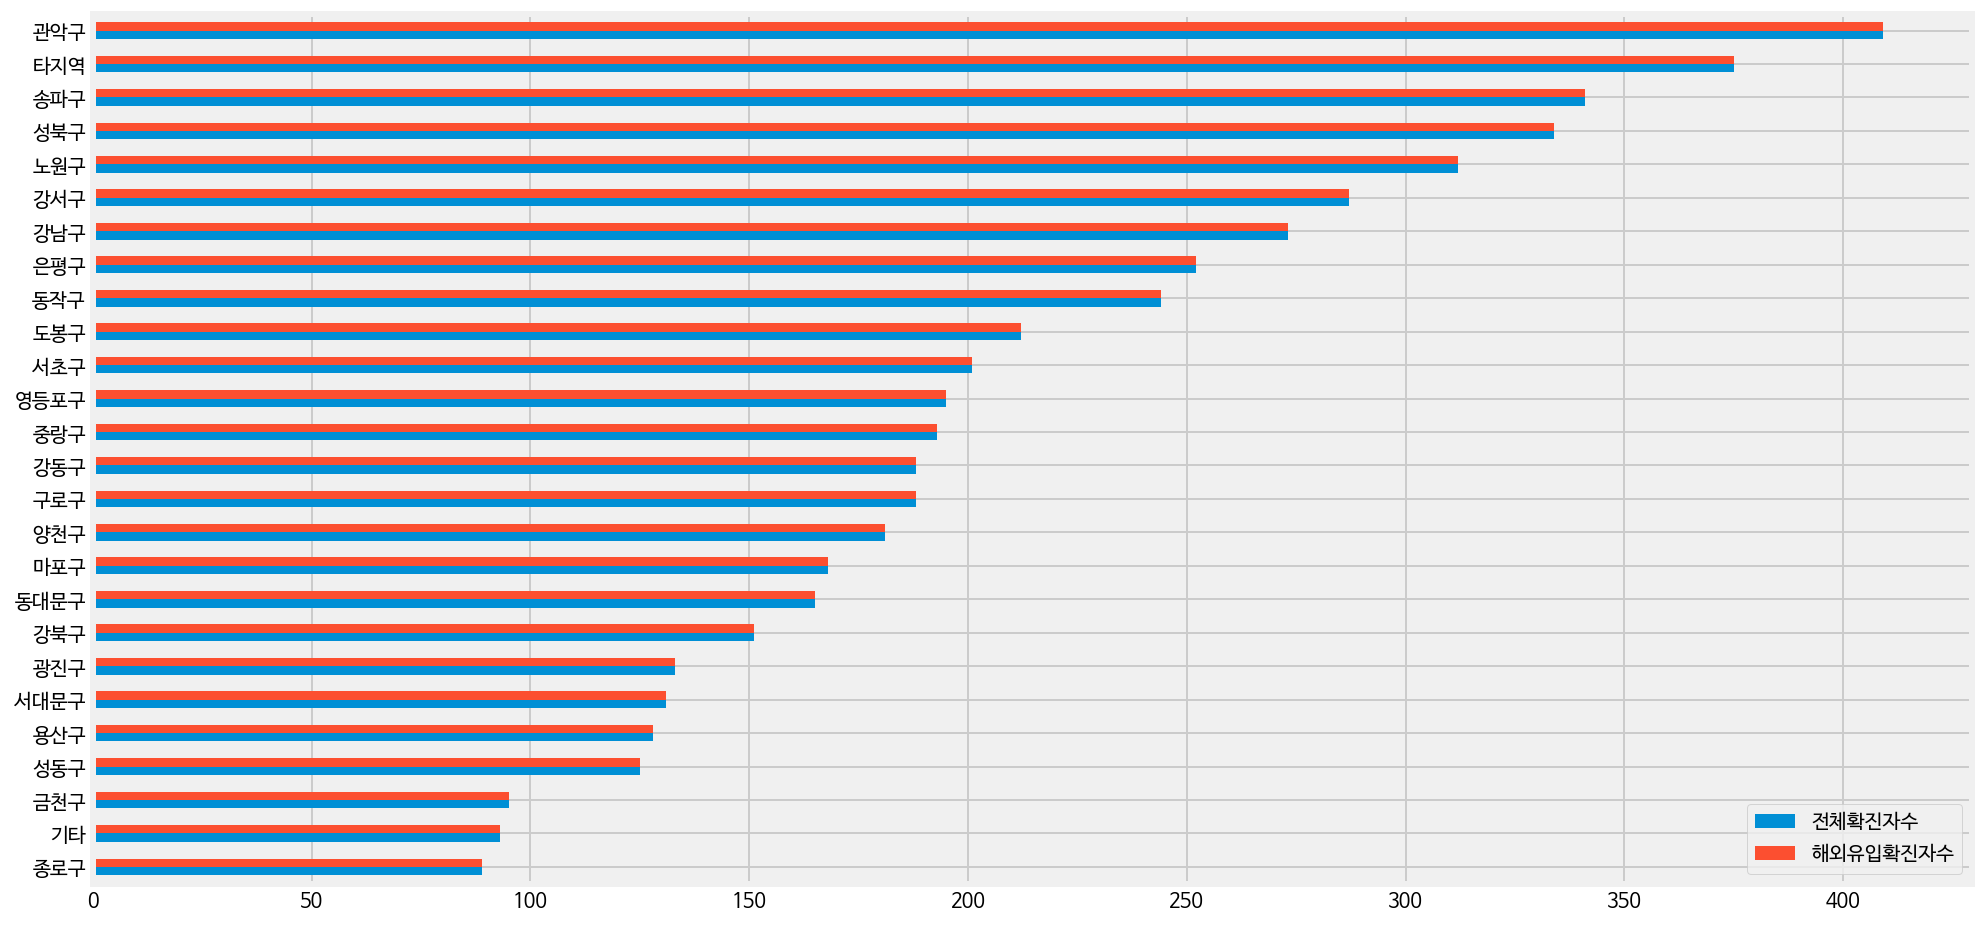

In [ ]:
# 시각화 하기

df_all_oversea_case.sort_values(by='해외유입확진자수').plot.barh(figsize = (15,8))

In [ ]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case['해외유입비율'] = (df_all_oversea_case['해외유입확진자수'] / df_all_oversea_case['전체확진자수']) *100
df_all_oversea_case

,전체확진자수,해외유입확진자수,해외유입비율
관악구,409,409,100.0
타지역,375,375,100.0
송파구,341,341,100.0
성북구,334,334,100.0
노원구,312,312,100.0
강서구,287,287,100.0
강남구,273,273,100.0
은평구,252,252,100.0
동작구,244,244,100.0
도봉구,212,212,100.0


### 해외유입 확진자 중 퇴원 여부

In [ ]:
df_oversea.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
0,5463,24413,10.07.,은평구,-,타시도 확진자 접촉,NaN,2020-10-07,10,41,10-07,은평구,,NaN,NaN,-
1,5462,24401,10.07.,용산구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,용산구,,NaN,NaN,-
2,5461,24385,10.07.,기타,미국,해외 접촉 추정,NaN,2020-10-07,10,41,10-07,기타,,NaN,NaN,미국
3,5460,24384,10.07.,서대문구,-,기타 확진자 접촉,NaN,2020-10-07,10,41,10-07,서대문구,,NaN,NaN,-
4,5459,24399,10.07.,노원구,-,감염경로 조사중,NaN,2020-10-07,10,41,10-07,노원구,,NaN,NaN,-


In [ ]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기

oversea_finish_count = df_oversea.groupby(['지역', '퇴원',])['연번'].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count

퇴원,False,True
지역,,
강남구,2,247
강동구,1,177
강북구,0,139
강서구,5,260
관악구,4,344
광진구,3,114
구로구,1,168
금천구,1,85
기타,3,40


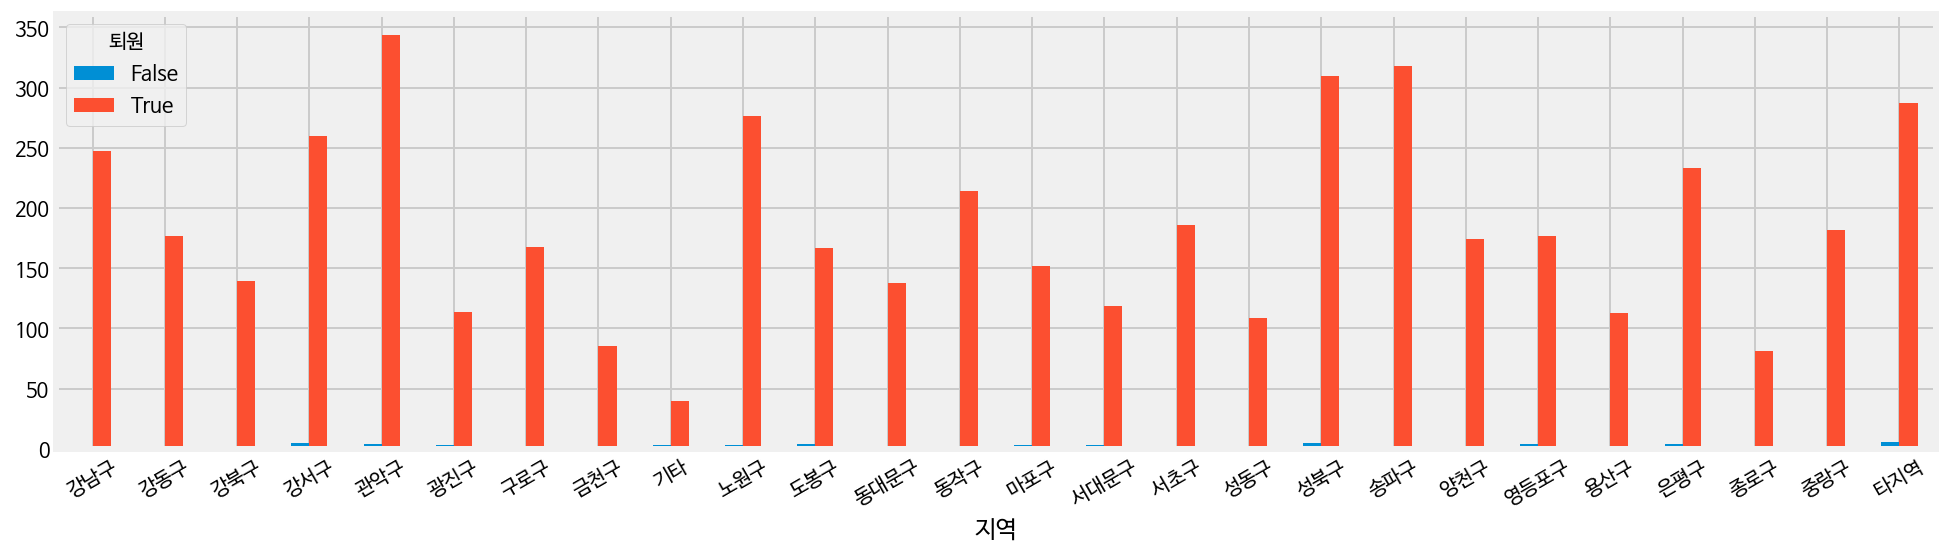

In [ ]:
oversea_finish_count.plot.bar(figsize = (15,4), rot=30)

### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [ ]:
month_gu = df_oversea.groupby(['월', '지역'])['연번'].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap = 'Greens')


지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,1,0
2,7,4,0,1,4,1,1,1,0,8,0,1,1,0,4,4,3,2,12,1,2,0,7,8,0,8
3,36,6,5,20,30,5,33,11,2,12,6,25,23,16,9,21,3,12,15,17,18,12,14,3,12,25
4,21,3,0,4,9,2,1,0,5,3,3,5,7,7,6,13,13,9,10,3,5,6,7,2,3,9
5,11,11,9,20,16,6,6,3,0,8,10,3,8,3,8,4,21,5,11,6,11,20,7,3,3,15
6,7,11,10,33,59,3,45,17,2,13,43,4,13,12,8,15,9,4,7,43,29,12,18,3,14,26
7,15,14,4,25,27,5,5,7,4,6,2,6,17,14,6,7,8,9,44,0,7,4,11,6,11,17
8,89,94,85,116,109,74,60,34,25,191,73,76,110,79,52,79,33,244,161,80,68,48,121,37,104,174
9,82,42,31,64,135,34,31,20,40,60,69,34,57,30,34,53,31,47,80,31,53,21,65,23,41,96


#### crosstab 으로 빈도수 구하기

#### pivot_table 로 빈도수 구하기

### 해외유입이 많은 지역

In [ ]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
# top_oversea_gu

top_oversea_gu = df_oversea['지역'].value_counts().head(10).index
top_oversea_gu

Index(['관악구', '타지역', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구'], dtype='object')

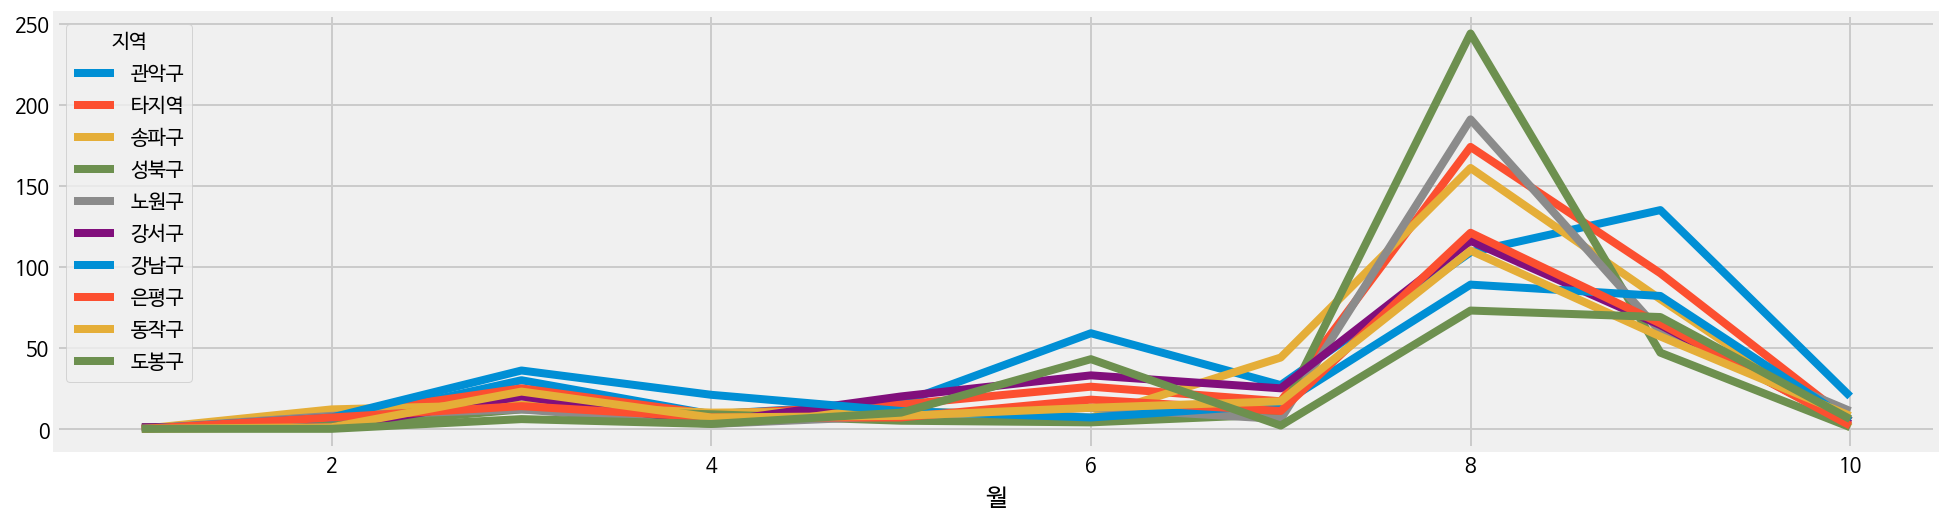

In [ ]:
# 시각화 하기

month_gu[top_oversea_gu].plot(figsize=(15,4))

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [ ]:
gruop_oversea_gu = df_oversea.groupby(['해외', '지역'])['연번'].count().unstack()
gruop_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
-,227,173,149,274,392,129,177,92,63,297,199,156,218,144,113,176,106,318,318,173,185,103,244,78,183,347
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
남미,4,0,0,0,1,0,0,0,1,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,0,4
네팔,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2
말레이시아,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
몰타,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [ ]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

gruop_oversea_gu.loc[['미국', '유럽', '남미','중국'],['강남구','서초구','송파구']]

지역,강남구,서초구,송파구
해외,,,
미국,26.0,12.0,8.0
유럽,10.0,9.0,8.0
남미,4.0,NaN,2.0
중국,NaN,NaN,NaN


In [ ]:
# top_oversea_gu 에 따른 확진수 보기

gruop_oversea_gu[top_oversea_gu].dropna(how='all').fillna(0).astype(int)

지역,관악구,타지역,송파구,성북구,노원구,강서구,강남구,은평구,동작구,도봉구
해외,,,,,,,,,,
-,392,347,318,318,297,274,227,244,218,199
21263,0,0,0,0,1,0,0,0,0,0
UAE,0,0,1,0,1,0,0,0,0,0
남미,1,4,2,0,1,0,4,0,1,0
러시아,0,2,0,0,0,0,1,0,0,0
미국,4,7,8,10,2,5,26,2,7,6
방글라데시,0,0,0,0,0,0,1,0,1,0
베트남,0,0,0,0,0,1,0,0,2,0
싱가포르,0,0,1,0,0,0,0,0,0,0


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!